**Homework_1_Data Analysis in Business**

**Customer Analytics**


# **Task**

You are presented with sample data on bank loan applications.

The table contains loan application data, as well as extracted data on existing bank clients (transaction activity and issued loans).

# Downloading data

In [109]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import os, random, numpy as np
os.environ['PYTHONHASHSEED'] = '0'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
random.seed(0); np.random.seed(0)
try:
    from threadpoolctl import threadpool_limits; threadpool_limits(1)
except Exception:
    pass

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [112]:
df_original = pd.read_csv('HW1_var_1.csv', sep=";")

# 1. Exploratory data analysis

## Initialising everything

In [113]:
df = df_original

In [114]:
df.shape

(10243, 44)

In [115]:
cols = df.columns
for i in range(len(cols)):
  print(cols[i])

Номер варианта
ID
INCOME_BASE_TYPE
CREDIT_PURPOSE
INSURANCE_FLAG
DTI
SEX
FULL_AGE_CHILD_NUMBER
DEPENDANT_NUMBER
EDUCATION
EMPL_TYPE
EMPL_SIZE
BANKACCOUNT_FLAG
Period_at_work
age
EMPL_PROPERTY
EMPL_FORM
FAMILY_STATUS
max90days
max60days
max30days
max21days
max14days
avg_num_delay
if_zalog
num_AccountActive180
num_AccountActive90
num_AccountActive60
Active_to_All_prc
numAccountActiveAll
numAccountClosed
sum_of_paym_months
all_credits
Active_not_cc
own_closed
min_MnthAfterLoan
max_MnthAfterLoan
dlq_exist
thirty_in_a_year
sixty_in_a_year
ninety_in_a_year
thirty_vintage
sixty_vintage
ninety_vintage


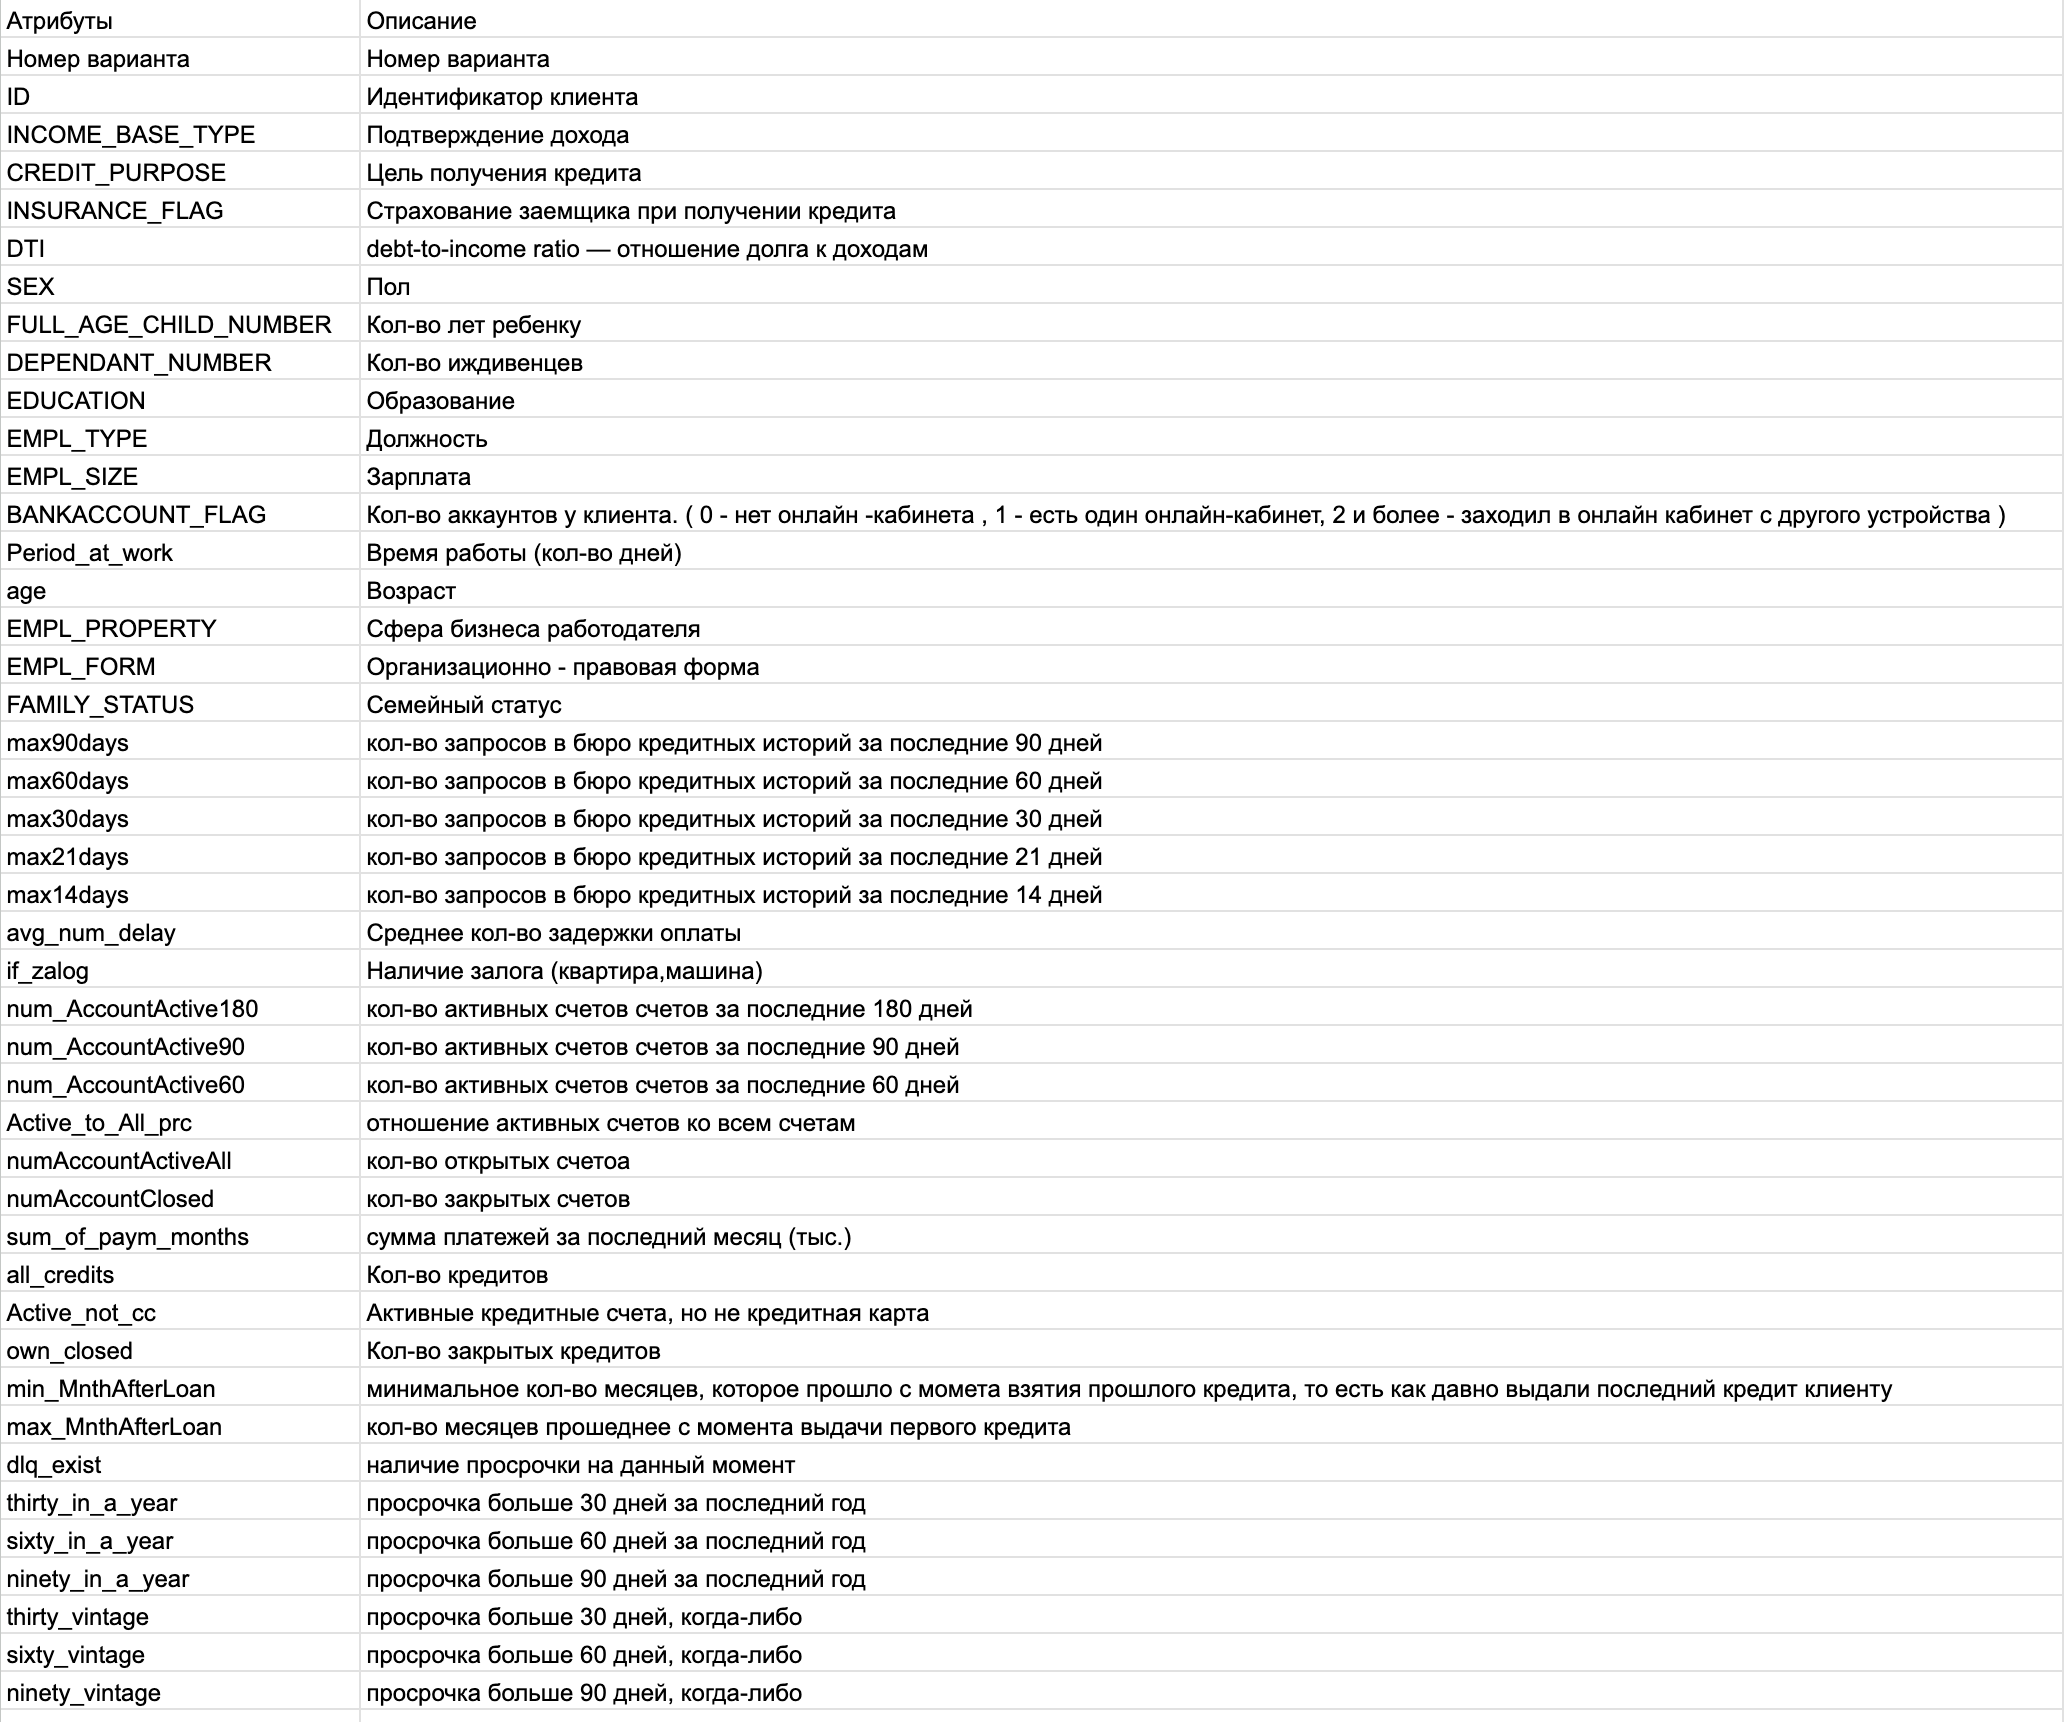

Let's take a look at the number of unique, null and NaN values in each column:

In [116]:
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), (df == 0).sum(axis=0) / len(df) * 100, df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

def print_from_df(df):
    data = []
    for column in df:
        data.append([column] + columnValues(df[column]))
    print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', '% of Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

print_from_df(df)

| Column                |   Count Unique |   Count Zeros |   % of Zeros |   Count NaNs |   % of NaNs | data type   |
|-----------------------+----------------+---------------+--------------+--------------+-------------+-------------|
| Номер варианта        |              1 |             0 |    0         |            0 |         0   | int64       |
| ID                    |          10243 |             0 |    0         |            0 |         0   | int64       |
| INCOME_BASE_TYPE      |              4 |             0 |    0         |           66 |         0.6 | object      |
| CREDIT_PURPOSE        |             10 |             0 |    0         |            0 |         0   | object      |
| INSURANCE_FLAG        |              2 |          3964 |   38.6996    |            0 |         0   | int64       |
| DTI                   |             60 |             0 |    0         |          134 |         1.3 | float64     |
| SEX                   |              2 |             0 |    0 

We can obviously drop the variant column, as it is unrelated to the task and only differs from file to file, signifying the variant the given data is related to

Additionally, since there are

In [117]:
rows = df.shape[0]
rows

10243

rows, and the number of UNIQUE client IDs is the exact same, there is no need to keep track of said IDs, unlike in the dataset we worked on during class (if there were multiple iterations of the same ID, we would have to keep in mind that some transactions were linked to the same customer)

In [118]:
df = df.drop(columns=["Номер варианта", "ID"])

In [119]:
print_from_df(df)

| Column                |   Count Unique |   Count Zeros |   % of Zeros |   Count NaNs |   % of NaNs | data type   |
|-----------------------+----------------+---------------+--------------+--------------+-------------+-------------|
| INCOME_BASE_TYPE      |              4 |             0 |    0         |           66 |         0.6 | object      |
| CREDIT_PURPOSE        |             10 |             0 |    0         |            0 |         0   | object      |
| INSURANCE_FLAG        |              2 |          3964 |   38.6996    |            0 |         0   | int64       |
| DTI                   |             60 |             0 |    0         |          134 |         1.3 | float64     |
| SEX                   |              2 |             0 |    0         |            0 |         0   | object      |
| FULL_AGE_CHILD_NUMBER |              8 |          6154 |   60.0801    |            1 |         0   | float64     |
| DEPENDANT_NUMBER      |              4 |         10211 |   99.

Having tackled the obvious problematic spots, let's take a look at the rest of the data. Something that immediately captured my attention is that over half of the columns have more than 6 thousand missing records.

Something else of note in this regard is that most of these missing records (but not all) have to do with various time spans related to the account. Could it be that the missing data has to do with some of the accounts being brand new? And, more importantly, would any of these accounts matter to us in that case - we need *data* for segmentation, after all?

## Categorical data

Let's take a look at the categorical data available. Since some of it is already presented in numeric form, I believe it'd be easier to make sense of what is and isn't categorical by hand rather than employ the usage of basic python methods for observing data types.

Categoricals:

In [120]:
cats = ["INCOME_BASE_TYPE", "CREDIT_PURPOSE", "INSURANCE_FLAG", "SEX", "EDUCATION", "EMPL_TYPE", "EMPL_SIZE", "BANKACCOUNT_FLAG", "EMPL_PROPERTY", "EMPL_FORM", "FAMILY_STATUS", "if_zalog", "dlq_exist", "thirty_in_a_year", "sixty_in_a_year", "ninety_in_a_year", "thirty_vintage", "sixty_vintage", "ninety_vintage"]
cats

['INCOME_BASE_TYPE',
 'CREDIT_PURPOSE',
 'INSURANCE_FLAG',
 'SEX',
 'EDUCATION',
 'EMPL_TYPE',
 'EMPL_SIZE',
 'BANKACCOUNT_FLAG',
 'EMPL_PROPERTY',
 'EMPL_FORM',
 'FAMILY_STATUS',
 'if_zalog',
 'dlq_exist',
 'thirty_in_a_year',
 'sixty_in_a_year',
 'ninety_in_a_year',
 'thirty_vintage',
 'sixty_vintage',
 'ninety_vintage']

Non-categoricals:

In [121]:
non_cats = [c for c in df.columns if c not in set(cats)]
non_cats

['DTI',
 'FULL_AGE_CHILD_NUMBER',
 'DEPENDANT_NUMBER',
 'Period_at_work',
 'age',
 'max90days',
 'max60days',
 'max30days',
 'max21days',
 'max14days',
 'avg_num_delay',
 'num_AccountActive180',
 'num_AccountActive90',
 'num_AccountActive60',
 'Active_to_All_prc',
 'numAccountActiveAll',
 'numAccountClosed',
 'sum_of_paym_months',
 'all_credits',
 'Active_not_cc',
 'own_closed',
 'min_MnthAfterLoan',
 'max_MnthAfterLoan']

### INCOME_BASE_TYPE

In [122]:
df.INCOME_BASE_TYPE.unique()

array(['Свободная форма с печатью работодателя',
       'Поступление зарплаты на счет', '2НДФЛ',
       'Форма банка (без печати работодателя)', nan], dtype=object)

Nothing odd here - four unique non-nan values and 66 nans out of ~10k rows. NaNs in categoricals cannot be inferred, so let's remove them:

In [123]:
df = df[df['INCOME_BASE_TYPE'].notna()]

### CREDIT_PURPOSE

Reasons why customers may want to get a loan:

In [124]:
df.CREDIT_PURPOSE.unique()

array(['Другое', 'Лечение', 'Ремонт', 'Отпуск', 'Покупка автомобиля',
       'Покупка бытовой техники', 'Покупка земли',
       'Покупка недвижимости/ строительство', 'Покупка мебели',
       'Обучение'], dtype=object)

I wonder how many of "Другое" there are in this one:

In [125]:
df.CREDIT_PURPOSE.value_counts()

,count
CREDIT_PURPOSE,
Ремонт,5685
Покупка автомобиля,1707
Покупка недвижимости/ строительство,1393
Другое,328
Отпуск,327
Покупка мебели,215
Покупка земли,149
Покупка бытовой техники,130
Лечение,123


Okay, it's still <10%, so it's not a big deal.

### INSURANCE_FLAG, SEX

Quite obviously a boolean flag in integer form (hence the ~30% of zeros):

In [126]:
df.INSURANCE_FLAG.unique()

array([1, 0])

(^ notice how there are no missing values)


Sex, too, is a boolean flag here, albeit in text form. While I, as a human, can understand this, it's certainly not ideal for clusterisation. Therefore, let's replace these values with numeric ones: Female = 1, Male = 0

In [127]:
df.SEX.unique()

array(['женский', 'мужской'], dtype=object)

In [128]:
df['SEX'] = df['SEX'].replace({'мужской': 0, 'женский': 1}).astype(int)

/tmp/ipython-input-3217672100.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SEX'] = df['SEX'].replace({'мужской': 0, 'женский': 1}).astype(int)


In [129]:
df.SEX.unique()

array([1, 0])

### EDUCATION

In [130]:
df.EDUCATION.unique()

array(['Высшее/Второе высшее/Ученая степень', 'высшее', 'среднее',
       'второе высшее', 'среднее-специальное', 'незаконченное высшее',
       '*n.a.*', 'ученая степень', 'Неполное среднее'], dtype=object)

In [131]:
df.EDUCATION.value_counts()

,count
EDUCATION,
высшее,5880
среднее-специальное,1696
Высшее/Второе высшее/Ученая степень,1513
среднее,448
второе высшее,320
незаконченное высшее,269
*n.a.*,36
ученая степень,11
Неполное среднее,4


We may observe the fact that there is a differentiation between higher education, secondary higher education and a PhD. However (in quite a depressing turn of events for us) there is also a catch-all value for all three of those.

There are two ways of proceeding from here on out: we could EITHER combine all of these four values under the guise of the same catch-all value, essentially reducing it to "the customer has at the very least attained one degree at a university" OR we could combine the catch-all variable with the "higher education" one, keeping the academics a separate significant factor.

I wouldn't go so far as to say that either of these are ideal, but one of them wouldn't introduce a bias into the data, whereas the other would eliminate an existing one (since right now we cannot trust any conclusions about any of the three variables - what if, theoretically, the catch-all in this slice of the data consists mostly of only ONE of the three classes)

Therefore, we shall combine the four classes into one:

In [132]:
collapse = {'высшее':'Высшее/Второе высшее/Ученая степень', 'второе высшее':'Высшее/Второе высшее/Ученая степень', 'ученая степень':'Высшее/Второе высшее/Ученая степень'}
df['EDUCATION'] = df['EDUCATION'].replace(collapse)


In [133]:
df.EDUCATION.value_counts()

,count
EDUCATION,
Высшее/Второе высшее/Ученая степень,7724
среднее-специальное,1696
среднее,448
незаконченное высшее,269
*n.a.*,36
Неполное среднее,4


We shall treat the *n.a.* value here as an alias for "No education", even though it's unlikely to be significant

### EMPL_TYPE

Type of employment

In [134]:
df.EMPL_TYPE.unique()

array(['специалист', 'менеджер среднего звена', 'менеджер высшего звена',
       'вспомогательный персонал', 'рабочий', 'торговый представитель',
       'менеджер по продажам', 'другое', nan, 'страховой агент'],
      dtype=object)

There is only one "nan" record here, let's drop it:

In [135]:
df = df[df['EMPL_TYPE'].notna()]

### EMPL_SIZE



The customer's salary

In [136]:
df.EMPL_SIZE.unique()

array(['< 50', '>250', '>100', '>=50', '>=200', '>=150', '>=100', nan,
       '*n.a.*'], dtype=object)

In [137]:
df.EMPL_SIZE.value_counts()

,count
EMPL_SIZE,
>250,6356
< 50,1425
>=50,975
>100,399
>=150,358
>=200,340
>=100,254
*n.a.*,2


While I will leave the *n.a.* data in place in case another slice of the data has a larger share of these, and they happen to be significant in some way (unlikely), there are also 134 records in the dataframe which are missing THIS value AND at the same time the numerical "DTI" - the debt-to-income ratio. It is quite important, and I doubt that it'll make sense to clusterise loan data for which we neither know the income, nor the debt. Hence, I will drop NAs here too:

In [138]:
df = df[df['EMPL_SIZE'].notna()]

Additionally, >100 and >=100 are very likely to mean almost the same thing, so they will be joined. Since there are less of, e.g., ">=100" than ">=200", I'm gonna believe that these are essentially bins of size 50 for the salaries.

In [139]:
collapse = {'>100':'>=100'}
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace(collapse)

In [140]:
df.EMPL_SIZE.value_counts()

,count
EMPL_SIZE,
>250,6356
< 50,1425
>=50,975
>=100,653
>=150,358
>=200,340
*n.a.*,2


### BANKACCOUNT_FLAG

Number of accounts owned by the client:

In [141]:
df.BANKACCOUNT_FLAG.unique()

array([ 0.,  1., nan,  3.,  4.])

In [142]:
df.BANKACCOUNT_FLAG.value_counts()

,count
BANKACCOUNT_FLAG,
0.0,6173
1.0,944
3.0,660
4.0,6


Here's the deal: we know that all the values from 2 and above mean the same thing for us, so we can combine them into the same one. We also know that this particular value (for some unknown reason) has over 2000 missing values, which is 20% of the given data.

In [143]:
df['BANKACCOUNT_FLAG'] = (
    df['BANKACCOUNT_FLAG']
      .replace({3: 2, 4: 2, 3.0: 2, 4.0: 2})
      .astype('Int64')
)

Additionally, guessing whether NaNs can be equated to zeroes or not will introduce obvious bias into the distribution, which is why (probably not surprising at this point) the NaN values will have to be removed.

In [144]:
df = df[df['BANKACCOUNT_FLAG'].notna()]

In [145]:
df.BANKACCOUNT_FLAG.value_counts()

,count
BANKACCOUNT_FLAG,
0,6173
1,944
2,666


### EMPL_PROPERTY

The type of environment in which the business operates:

In [146]:
df.EMPL_PROPERTY.unique()

array(['Торговля', 'Производство', 'Другое', 'Информационные технологии',
       'Финансы', 'Туризм', 'Государственная служба', 'Транспорт',
       'Строительство', 'Сельское и лесное хозяйство',
       'Юридические услуги', 'Наука'], dtype=object)

For once, the data doesn't need any modifications. Not for long though.

### EMPL_FORM

Legal type of the business:

In [147]:
df.EMPL_FORM.unique()

array(['ООО', nan, 'Иная форма', 'ЗАО', 'ОАО',
       'Индивидуальный предприниматель', 'Государственное предприятие'],
      dtype=object)

This doesn't look bad until one realises that this is one of the columns responsible for >60% of missing values.

### FAMILY_STATUS

In [148]:
df.FAMILY_STATUS.unique()

array(['женат / замужем', 'холост / не замужем', nan,
       'разведен / разведена', 'гражданский брак', 'повторный брак',
       'вдовец / вдова'], dtype=object)

Same thing with this column.

## The EMPL_FORM-FAMILY_STATUS debacle.

As one can clearly see, EMPL_FORM and FAMILY_STATUS are both missing the same exact number of values.

Given this, let's take a look at the slice of the df where both of these columns have missing values:

In [149]:
cols = ['EMPL_FORM', 'FAMILY_STATUS']
both_nan = df[df[cols].isna().all(axis=1)]
print_from_df(both_nan)

| Column                |   Count Unique |   Count Zeros |   % of Zeros |   Count NaNs |   % of NaNs | data type   |
|-----------------------+----------------+---------------+--------------+--------------+-------------+-------------|
| INCOME_BASE_TYPE      |              4 |             0 |       0      |            0 |           0 | object      |
| CREDIT_PURPOSE        |             10 |             0 |       0      |            0 |           0 | object      |
| INSURANCE_FLAG        |              2 |          1443 |      38.2454 |            0 |           0 | int64       |
| DTI                   |             57 |             0 |       0      |            0 |           0 | float64     |
| SEX                   |              2 |          2398 |      63.5569 |            0 |           0 | int64       |
| FULL_AGE_CHILD_NUMBER |              7 |          2237 |      59.2897 |            0 |           0 | float64     |
| DEPENDANT_NUMBER      |              4 |          3760 |      

Huh! It's clear as day that when both of these values are missing (and they are only ever missing simultaneously), every value below in the table is missing as well!

In [150]:
neither_nan = df[df[cols].notna().all(axis=1)]
print_from_df(neither_nan)

| Column                |   Count Unique |   Count Zeros |   % of Zeros |   Count NaNs |   % of NaNs | data type   |
|-----------------------+----------------+---------------+--------------+--------------+-------------+-------------|
| INCOME_BASE_TYPE      |              4 |             0 |     0        |            0 |         0   | object      |
| CREDIT_PURPOSE        |             10 |             0 |     0        |            0 |         0   | object      |
| INSURANCE_FLAG        |              2 |          1552 |    38.7032   |            0 |         0   | int64       |
| DTI                   |             58 |             0 |     0        |            0 |         0   | float64     |
| SEX                   |              2 |          2026 |    50.5237   |            0 |         0   | int64       |
| FULL_AGE_CHILD_NUMBER |              6 |          2466 |    61.4963   |            1 |         0   | float64     |
| DEPENDANT_NUMBER      |              3 |          3997 |    99

And when neither is missing, there are still 280 cases of simultaneously-missing values starting from avg_num_delay downwards.

Out of these variables, there are eight remaining categoricals: if_zalog (is there any property to facilitate the loan), dlq_exist (is there an overdue payment right now), thirty/sixty/ninety_in_a_year/vintage (was there an overdue payment g.t. 30/60/90 days this year/ever), all of them booleans.

As we've already established, the most logical way to proceed is by erasing the NaNs, as this categorical data is non-recoverable and attempts to recover it will introduce unknown biases into the data:

In [151]:
df = df[df['FAMILY_STATUS'].notna()]

It might not be that obvious as a decision, but I'm going to also remove a bit of numerical data (or rather, lack thereof?), as 280 accounts lack all numerical information, which makes them (almost) meaningless in segmentation - we don't even know the amount of accounts any of these people have. If they didn't have any accounts or credits, that data would show up as zero. Trying to replcae this data w/ averages would, once again, introduce potentially heavy biases, so it'd be a better decision to outright remove these records:

In [152]:
df = df[df['if_zalog'].notna()]



---

Moreover on this section: one of the initial rules for this problem was that points would be deduced if any non-clients were left after data cleanup. Lacking any data related to the bank is quite a significant factor pointing towards those specific rows being new loan applicants rather than existing clients. As such, it would not make sense to include them in the segmentation of the bank's customers

## Numerical data

Despite our original print_from_df output showing that the overwhelming majority of numerical data was missing, post-cleanup we can observe that there is barely any missing data for the numericals. Nevertheless, we will replace it with, e.g., mean values instead of removing it outright.

First, let's take a look at *just* the numerical values:

In [153]:
df_non_cats = df.filter(non_cats)
print_from_df(df_non_cats)

| Column                |   Count Unique |   Count Zeros |   % of Zeros |   Count NaNs |   % of NaNs | data type   |
|-----------------------+----------------+---------------+--------------+--------------+-------------+-------------|
| DTI                   |             58 |             0 |     0        |            0 |         0   | float64     |
| FULL_AGE_CHILD_NUMBER |              6 |          2269 |    60.8311   |            1 |         0   | float64     |
| DEPENDANT_NUMBER      |              3 |          3719 |    99.7051   |            0 |         0   | int64       |
| Period_at_work        |            257 |             0 |     0        |            1 |         0   | float64     |
| age                   |             39 |             0 |     0        |            0 |         0   | float64     |
| max90days             |             19 |          1048 |    28.0965   |            2 |         0.1 | float64     |
| max60days             |             17 |          1567 |    42

Now, let's code a method which will let us see basic statistical data about these columns:

In [154]:
def print_for_num(df_og):
    df = df_og.filter(non_cats)
    data = []
    for column in df:
        mean_val = df[column].mean()
        median_val = df[column].median()
        std_val = df[column].std()
        min_val = df[column].min()
        max_val = df[column].max()
        count_zeros = (df[column] == 0).sum() / df.shape[0] * 100
        count_nans = df[column].isna().sum()
        dtype = df[column].dtype

        data.append([column, mean_val, median_val, std_val, min_val, max_val, count_zeros, count_nans, dtype])

    headers = ['Column', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', '% of Zeros', 'Count NaNs', 'Data Type']
    print(tabulate(data, headers=headers, tablefmt='orgtbl'))

In [155]:
print_for_num(df)

| Column                |        Mean |     Median |    Std Dev |   Min |        Max |   % of Zeros |   Count NaNs | Data Type   |
|-----------------------+-------------+------------+------------+-------+------------+--------------+--------------+-------------|
| DTI                   |  0.387906   |  0.4       |  0.136053  |  0.02 |   0.59     |     0        |            0 | float64     |
| FULL_AGE_CHILD_NUMBER |  0.525878   |  0         |  0.744391  |  0    |   5        |    60.8311   |            1 | float64     |
| DEPENDANT_NUMBER      |  0.00348525 |  0         |  0.0674293 |  0    |   2        |    99.7051   |            0 | int64       |
| Period_at_work        | 55.8504     | 40         | 54.4273    |  6    | 436        |     0        |            1 | float64     |
| age                   | 35.6316     | 34         |  8.36625   | 23    |  62        |     0        |            0 | float64     |
| max90days             |  1.58691    |  1         |  1.83721   |  0    |  23      

In [156]:
df.shape

(3730, 42)

A few notes about the table we can observe above: all of the numerical data is in either float64 or int64 (the latter pertaining to the number of dependants, which cannot be a float number - "you cannot have 1.5 miners"). This means that we won't have to modify data types.

A lot of the values here are equal to zero - at least a third of the columns have at least 50% of the values equal to zero. Alas, it makes sense in each of the specific cases - the zeroes in "DEPENDANT_NUMBER" tell us that all but one of the remaining customers has no dependants, the zeroes in the children's age column (FULL_AGE_CHILD_NUMBER) signify that over half of the custoemrs have no children whatsoever. The rest signify either a cumulative value related to time (so there are more zeroes over a smaller time period) or the overall number of loans (I think it's obvious that there may be zero active loans at some point in time)

However, let's deal with the NaNs before continuing onwards:

In [157]:
def print_for_nan(df_og):
    df = df_og.filter(non_cats)
    data = []
    for column in df:
        count_nans = df[column].isna().sum()
        dtype = df[column].dtype

        data.append([column, count_nans, dtype])

    headers = ['Column', 'Count NaNs', 'Data Type']
    print(tabulate(data, headers=headers, tablefmt='orgtbl'))

In [158]:
print_for_nan(df)

| Column                |   Count NaNs | Data Type   |
|-----------------------+--------------+-------------|
| DTI                   |            0 | float64     |
| FULL_AGE_CHILD_NUMBER |            1 | float64     |
| DEPENDANT_NUMBER      |            0 | int64       |
| Period_at_work        |            1 | float64     |
| age                   |            0 | float64     |
| max90days             |            2 | float64     |
| max60days             |            2 | float64     |
| max30days             |            2 | float64     |
| max21days             |            2 | float64     |
| max14days             |            2 | float64     |
| avg_num_delay         |           16 | float64     |
| num_AccountActive180  |            0 | float64     |
| num_AccountActive90   |            0 | float64     |
| num_AccountActive60   |            0 | float64     |
| Active_to_All_prc     |            0 | float64     |
| numAccountActiveAll   |            0 | float64     |
| numAccou

FULL_AGE_CHILD_... has 1 missing value, Period_at_work has 1 missing value as vell, max90days-max14days all have 2 missing values in the same row and avg_num_delay has 16 missing values.

We will replace all of these with mean values:

In [159]:
cols = ["FULL_AGE_CHILD_NUMBER", "Period_at_work", "max90days", "max60days", "max30days", "max21days", "max14days", "avg_num_delay"]
df[cols] = df[cols].transform(lambda s: s.fillna(s.mean()))

In [160]:
print_for_nan(df)

| Column                |   Count NaNs | Data Type   |
|-----------------------+--------------+-------------|
| DTI                   |            0 | float64     |
| FULL_AGE_CHILD_NUMBER |            0 | float64     |
| DEPENDANT_NUMBER      |            0 | int64       |
| Period_at_work        |            0 | float64     |
| age                   |            0 | float64     |
| max90days             |            0 | float64     |
| max60days             |            0 | float64     |
| max30days             |            0 | float64     |
| max21days             |            0 | float64     |
| max14days             |            0 | float64     |
| avg_num_delay         |            0 | float64     |
| num_AccountActive180  |            0 | float64     |
| num_AccountActive90   |            0 | float64     |
| num_AccountActive60   |            0 | float64     |
| Active_to_All_prc     |            0 | float64     |
| numAccountActiveAll   |            0 | float64     |
| numAccou

No NaNs. At last.

## Looking at the data


First, let's look at the df after all the permutations:

In [161]:
print_from_df(df)

| Column                |   Count Unique |   Count Zeros |   % of Zeros |   Count NaNs |   % of NaNs | data type   |
|-----------------------+----------------+---------------+--------------+--------------+-------------+-------------|
| INCOME_BASE_TYPE      |              4 |             0 |     0        |            0 |           0 | object      |
| CREDIT_PURPOSE        |             10 |             0 |     0        |            0 |           0 | object      |
| INSURANCE_FLAG        |              2 |          1460 |    39.1421   |            0 |           0 | int64       |
| DTI                   |             58 |             0 |     0        |            0 |           0 | float64     |
| SEX                   |              2 |          1897 |    50.8579   |            0 |           0 | int64       |
| FULL_AGE_CHILD_NUMBER |              7 |          2269 |    60.8311   |            0 |           0 | float64     |
| DEPENDANT_NUMBER      |              3 |          3719 |    99

### Now, let's observe the correlation matrix for the numericals:

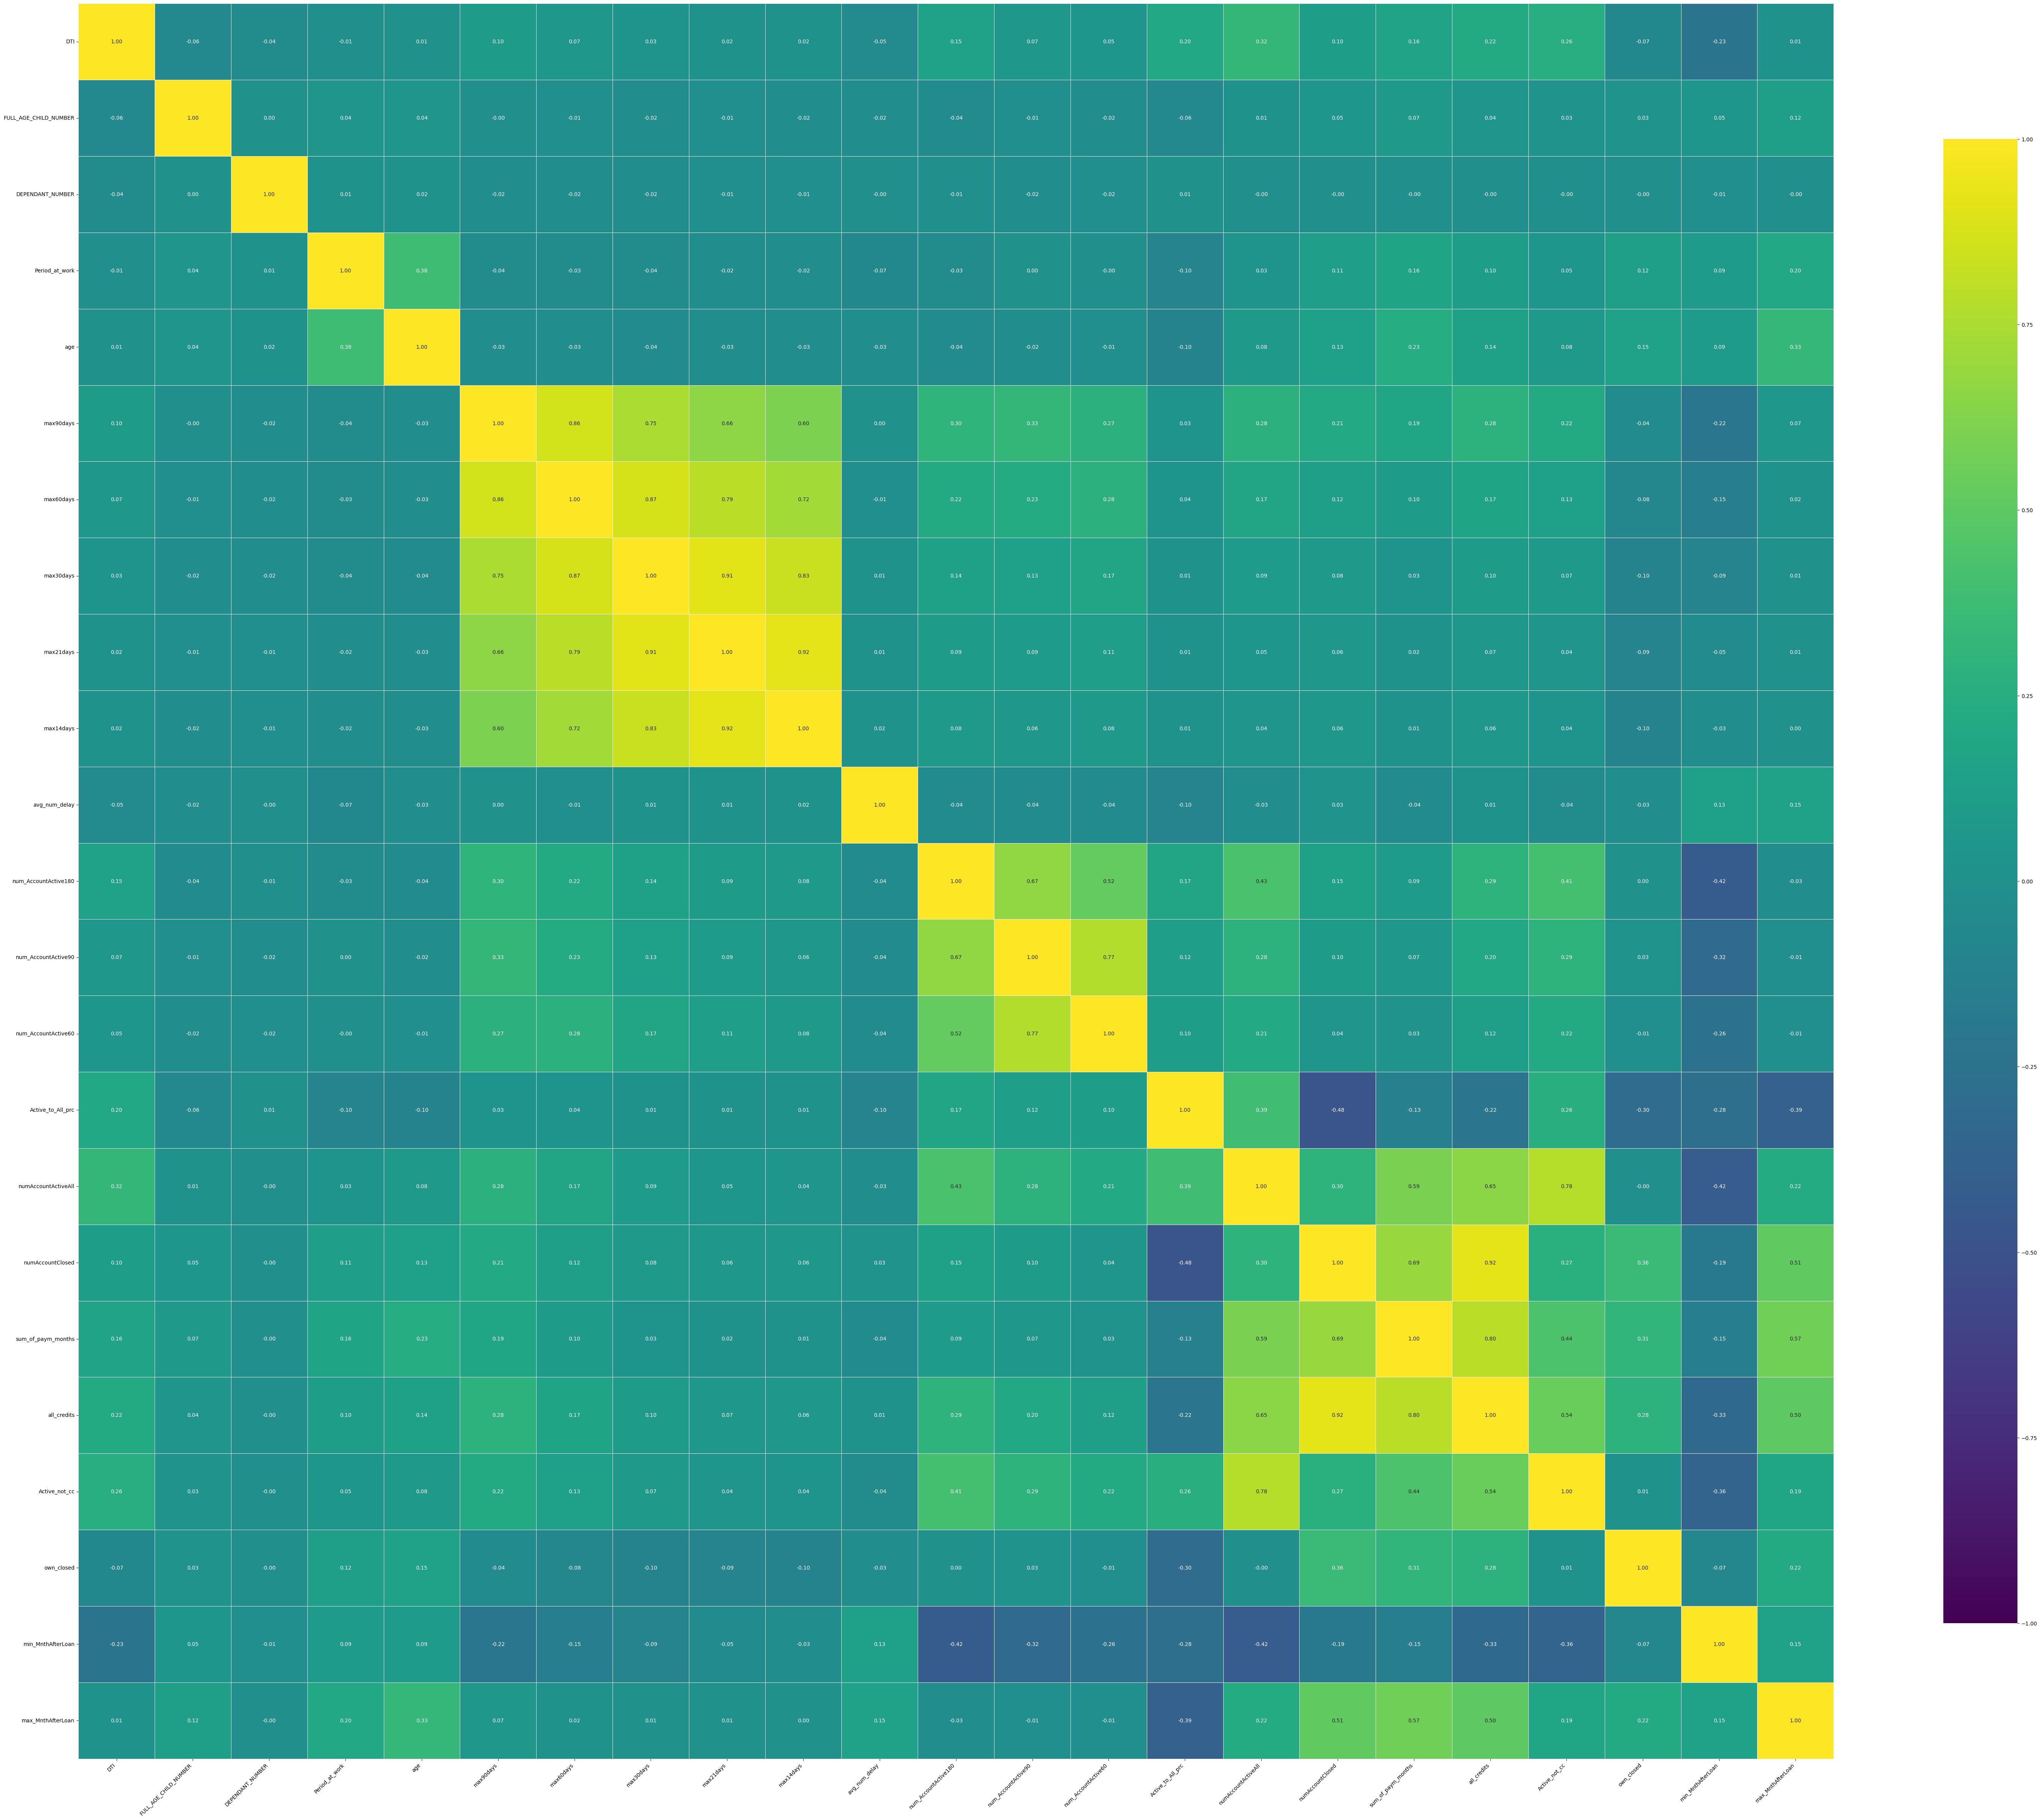

In [162]:
sub  = df.loc[:, non_cats]
corr = sub.corr(numeric_only=True)

plt.figure(figsize=(60,50))
sns.heatmap(corr, vmin=-1, vmax=1, cmap='viridis', annot=True, fmt=".2f",
            square=True, cbar_kws={'shrink': .8}, linewidths=.5, linecolor='white')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Choosing 30% as the threshold, I obtain four classes of correlated variables:

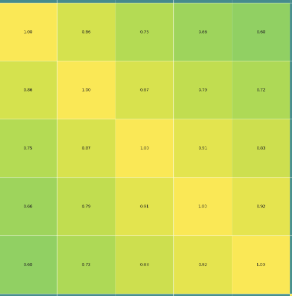

maxNdays [data requests about a client's credit history] (N $\in {14, 21, 30, 60, 90}$) - highly positive correlation (even higher for N close to each other). Makes sense, as the value for N = 90 cannot be lower than one for N = 60 and so on.

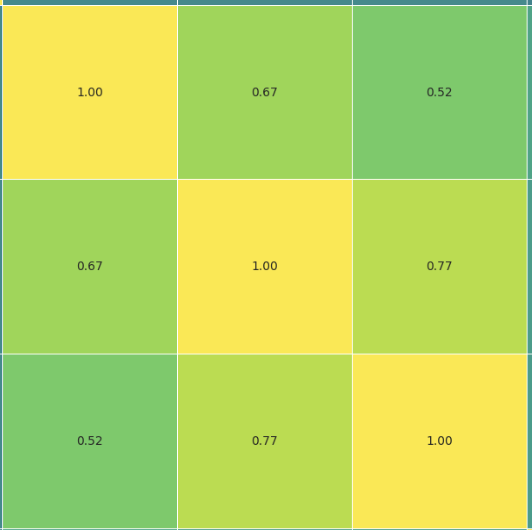

num_AccountActiveN [number of active accounts in the past N days] (N $\in {60, 90, 180}$) - highly positive correlation. The reason for this is the same as for the last class - every value for a higher N cannot be lower than the one for a lower N

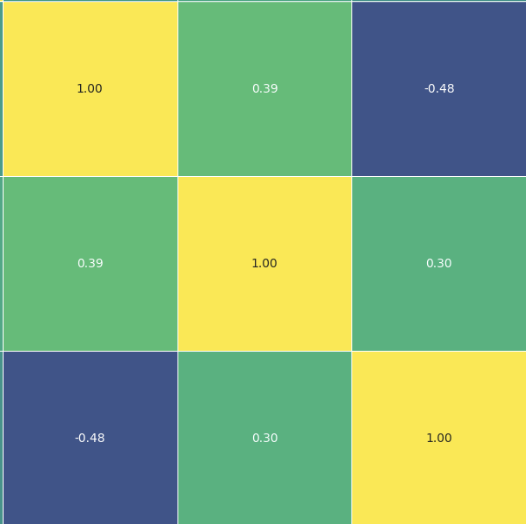

Active_to_All_pre (num of active accounts divided by total number of accounts), numAccountActiveAll (number of active accounts) and numAccountClosed (number of closed accounts).

There's a positive correlation between Active_to_All_pre and numAccountActiveAll, and a highly negative correlation between Active_to_All_pre and numAccountClosed, which makes sense, as both of these make up Active_to_All_pre in the form of a fraction ((numAccountActiveAll)/(numAccountActiveAll+numAccountClosed)).


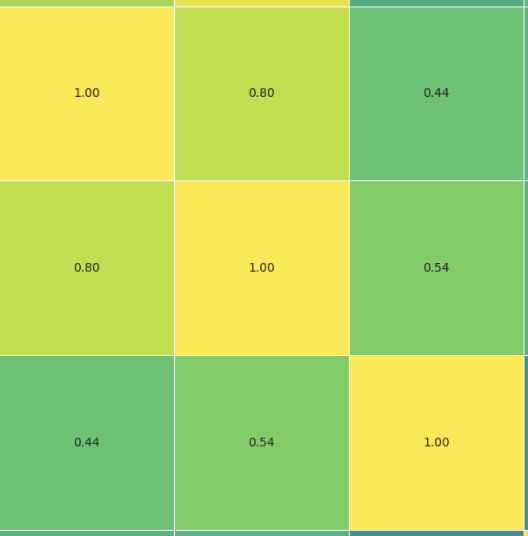

Finally, there's a strong postive correlation between the total payments (sum_of_paym_months) and the number of credits (all_credits) - due to basic summation. The more credits you have - the more you pay.

And, additionally, there's a strong positive correlation between the number of credits and the number of active non-credit card credits (Active_not_cc). This also makes sense - the more credits one has, the higher their total number of credits.

### And data distribution for categoricals:

In [163]:
len(cats)

19

In [164]:
def visualise_cat(df, col):
    s = df[col].astype("object")
    vc = s.value_counts(dropna=False)

    vc = vc.sort_values(ascending=False)
    pct = (vc / vc.sum()) * 100

    fig, ax = plt.subplots(figsize=(8, 4.5))
    bars = ax.bar(vc.index.astype(str), vc.values)
    ax.set_title(f"{col} — distribution")
    ax.set_ylabel("Count")
    ax.set_xlabel("Category")
    ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")

    for rect, p in zip(bars, pct.values):
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
                f"{p:.1f}%", ha="center", va="bottom", fontsize=8, rotation=0)

    plt.tight_layout()
    plt.show()


#### The profile of the "average" customer based on categoricals (many graphs ahead):

##### Income type: our most common customer gets their salary sent to their account

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


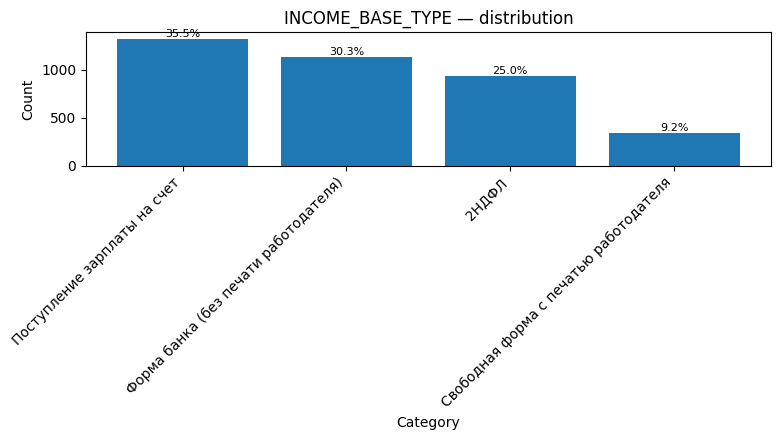

In [165]:
visualise_cat(df, cats[0])

##### They (predominantly) usually seek loans for renovations:

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


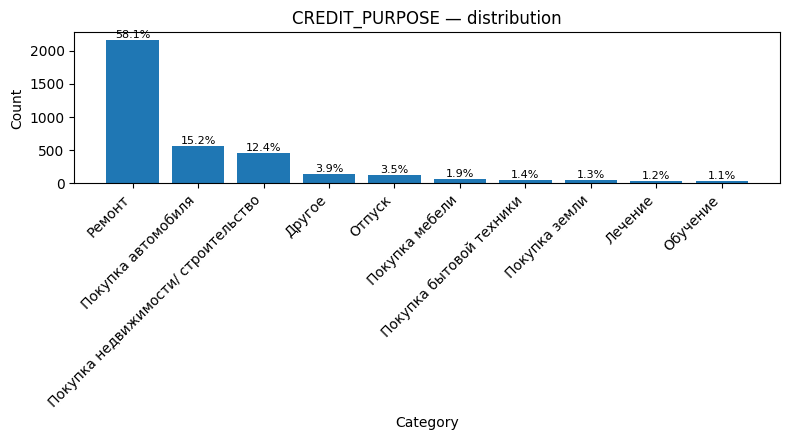

In [166]:
visualise_cat(df, cats[1])

##### They have insurance:

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


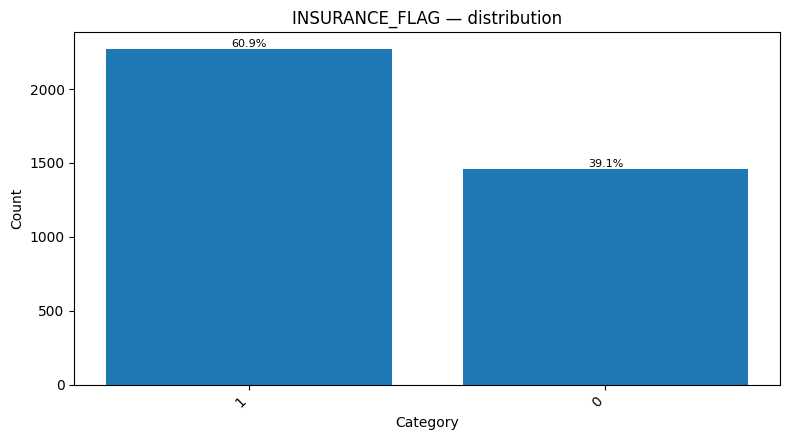

In [167]:
visualise_cat(df, cats[2])

##### They're male (although there's barely a difference in the distribution):

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


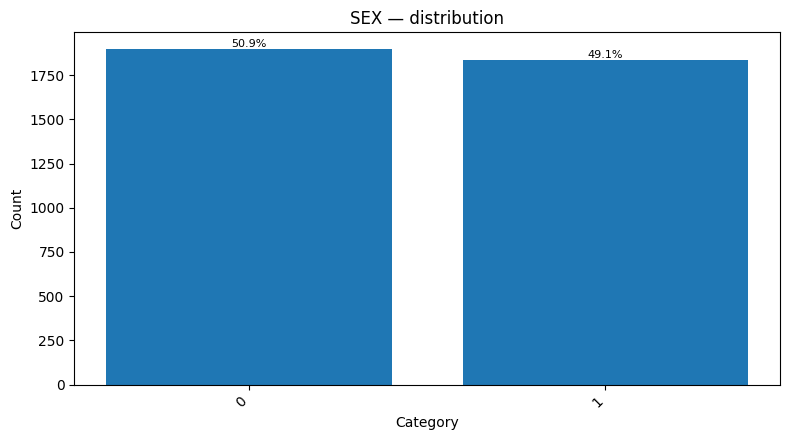

In [168]:
visualise_cat(df, cats[3])

##### They have attained at least higher education:

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


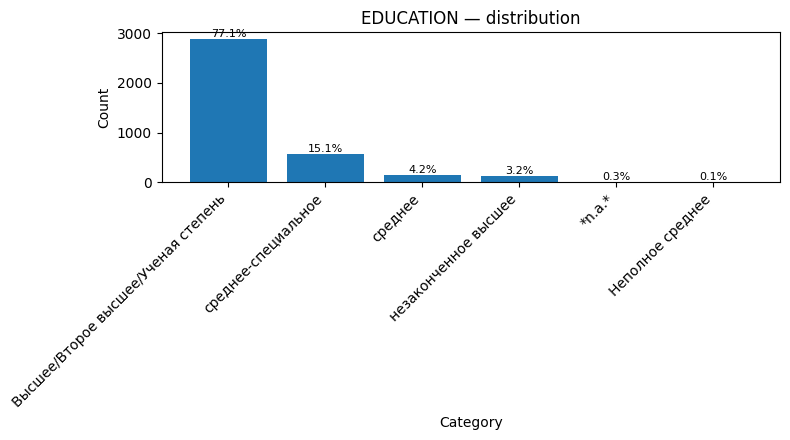

In [169]:
visualise_cat(df, cats[4])

##### They are a specialist:

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


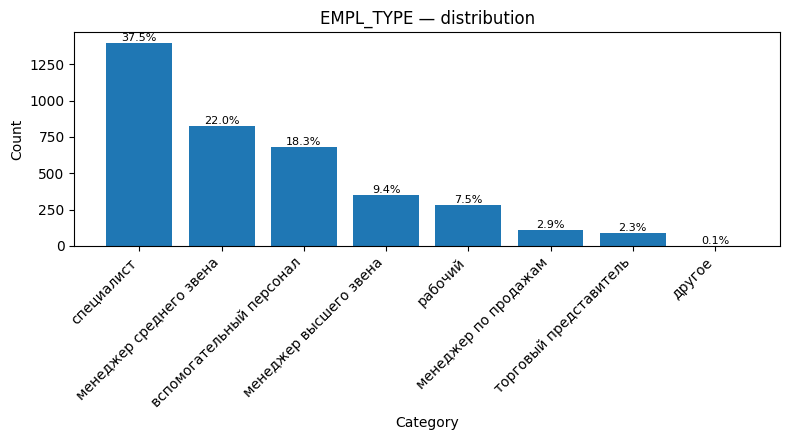

In [170]:
visualise_cat(df, cats[5])

##### They have a salary of 250 or higher:

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


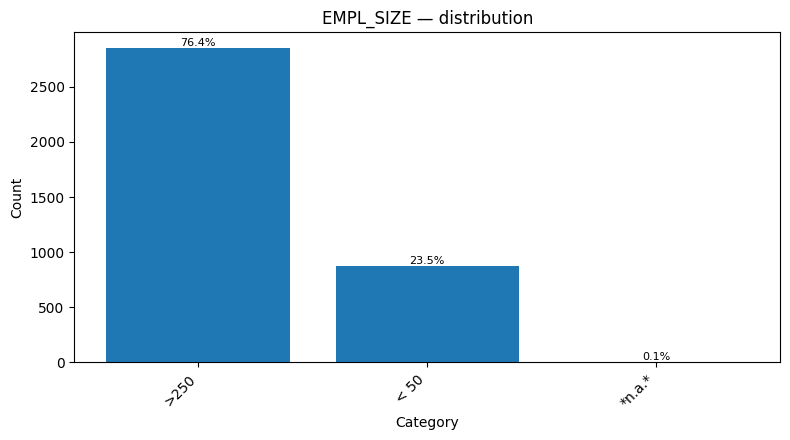

In [171]:
visualise_cat(df, cats[6])

##### They don't have an online account:

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


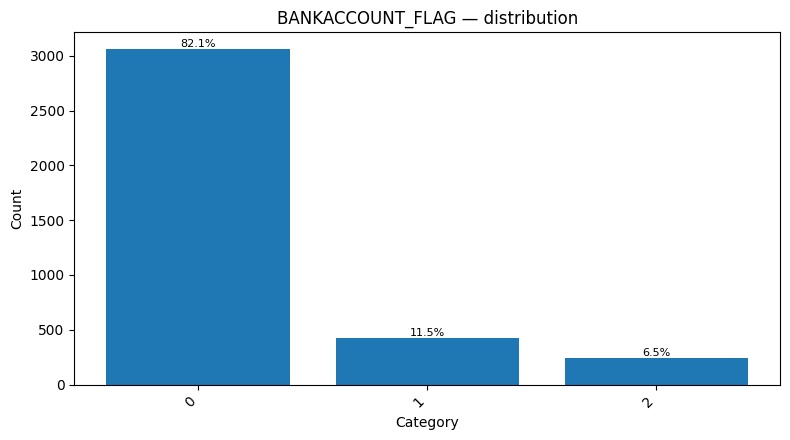

In [172]:
visualise_cat(df, cats[7])

##### They work in Sales:

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


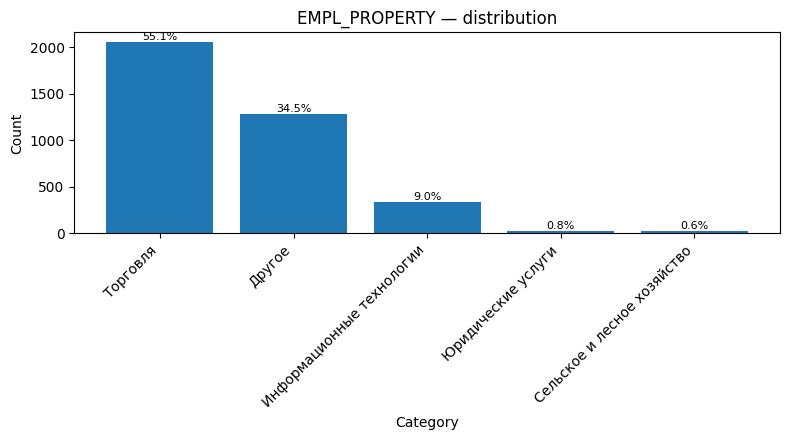

In [173]:
visualise_cat(df, cats[8])

##### Their company is an "OOO"

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


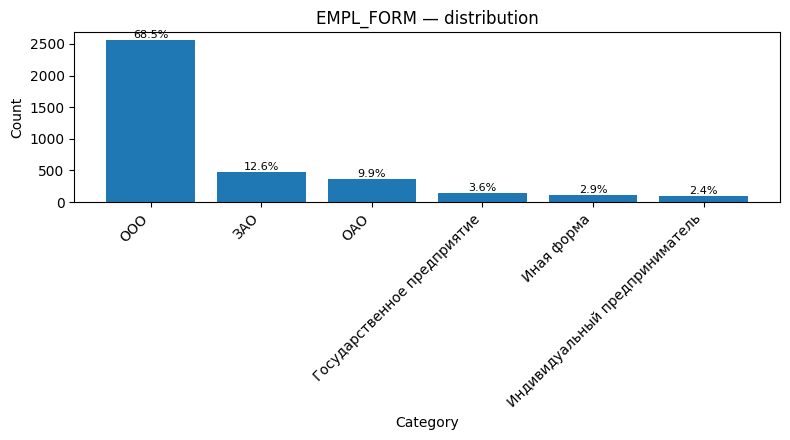

In [174]:
visualise_cat(df, cats[9])

##### They are married

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


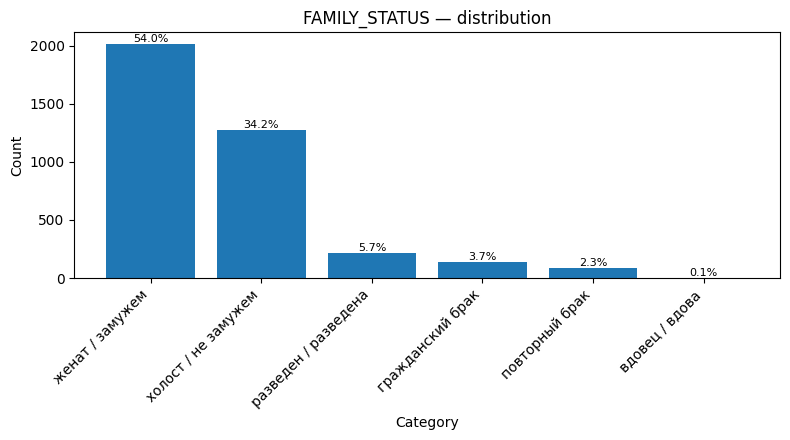

In [175]:
visualise_cat(df, cats[10])

##### They lack a collateral:

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


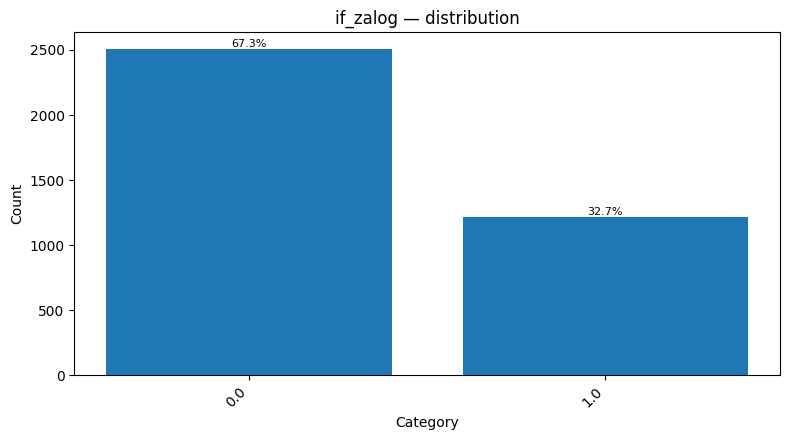

In [176]:
visualise_cat(df, cats[11])

##### They are currently in arrears:

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


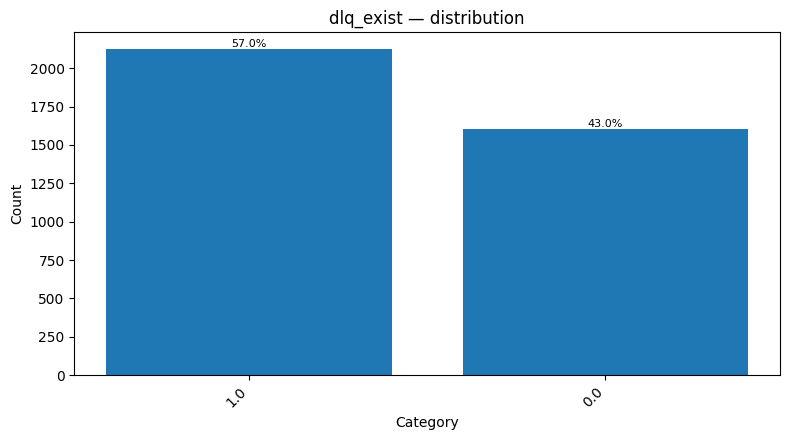

In [177]:
visualise_cat(df, cats[12])

##### They have never been overdue for more than 30 days:

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


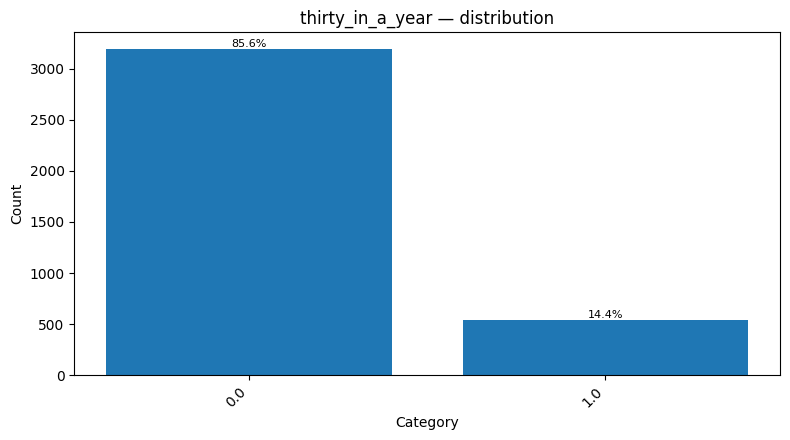

In [178]:
visualise_cat(df, cats[13])

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


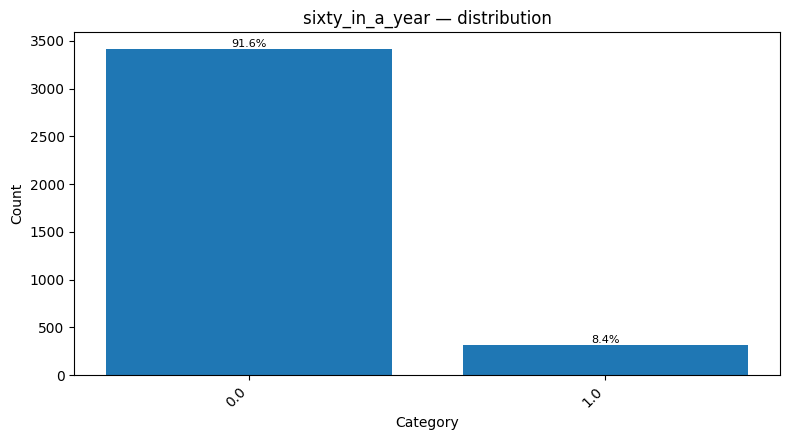

In [179]:
visualise_cat(df, cats[14])

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


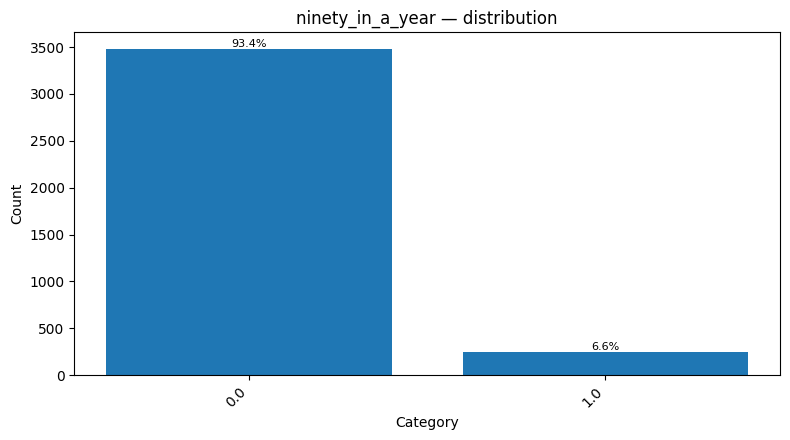

In [180]:
visualise_cat(df, cats[15])

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


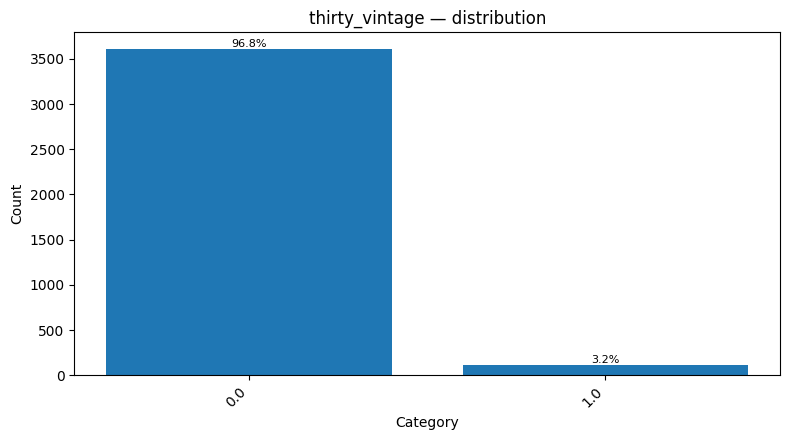

In [181]:
visualise_cat(df, cats[16])

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


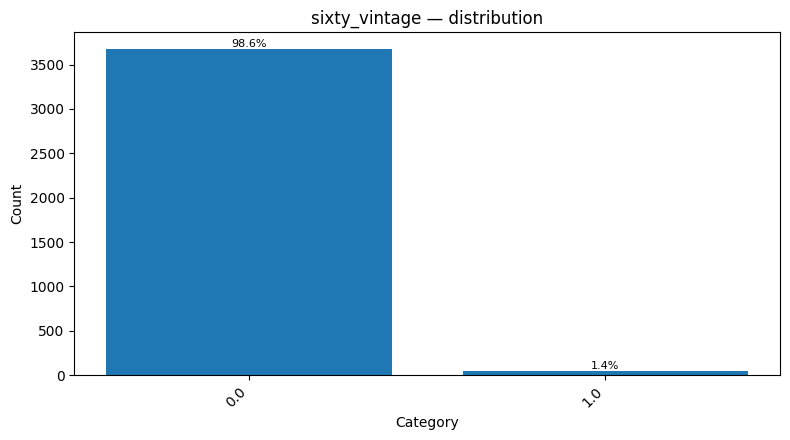

In [182]:
visualise_cat(df, cats[17])

/tmp/ipython-input-2279662835.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")


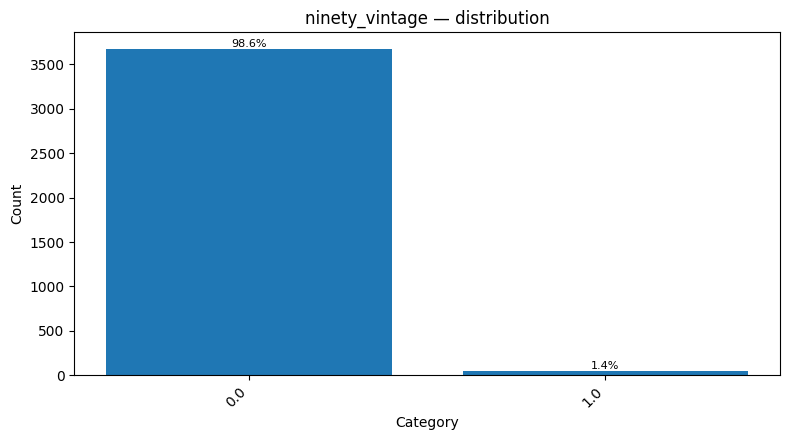

In [183]:
visualise_cat(df, cats[18])

##### Additionally, based on numerical data:

In [184]:
print_for_num(df)

| Column                |        Mean |     Median |    Std Dev |   Min |        Max |   % of Zeros |   Count NaNs | Data Type   |
|-----------------------+-------------+------------+------------+-------+------------+--------------+--------------+-------------|
| DTI                   |  0.387906   |  0.4       |  0.136053  |  0.02 |   0.59     |     0        |            0 | float64     |
| FULL_AGE_CHILD_NUMBER |  0.525878   |  0         |  0.744291  |  0    |   5        |    60.8311   |            0 | float64     |
| DEPENDANT_NUMBER      |  0.00348525 |  0         |  0.0674293 |  0    |   2        |    99.7051   |            0 | int64       |
| Period_at_work        | 55.8504     | 40         | 54.42      |  6    | 436        |     0        |            0 | float64     |
| age                   | 35.6316     | 34         |  8.36625   | 23    |  62        |     0        |            0 | float64     |
| max90days             |  1.58691    |  1         |  1.83671   |  0    |  23      

This customer is roughly 36 years old, has no children, has been at their current workplace for 55 days and has 6 credits, one of which is active AND not on a credit card

## Getting ready for segmentation:

We now have to convert ordinal categoricals into numerical data and encode the other categoricals using one-hot

In [185]:
df_pre_conversion = df.copy()

^ for later segment analysis

In [186]:
print_from_df(df.loc[:, cats])

| Column           |   Count Unique |   Count Zeros |   % of Zeros |   Count NaNs |   % of NaNs | data type   |
|------------------+----------------+---------------+--------------+--------------+-------------+-------------|
| INCOME_BASE_TYPE |              4 |             0 |       0      |            0 |           0 | object      |
| CREDIT_PURPOSE   |             10 |             0 |       0      |            0 |           0 | object      |
| INSURANCE_FLAG   |              2 |          1460 |      39.1421 |            0 |           0 | int64       |
| SEX              |              2 |          1897 |      50.8579 |            0 |           0 | int64       |
| EDUCATION        |              6 |             0 |       0      |            0 |           0 | object      |
| EMPL_TYPE        |              8 |             0 |       0      |            0 |           0 | object      |
| EMPL_SIZE        |              3 |             0 |       0      |            0 |           0 | object

### Binary values (do not need conversion):

In [187]:
bin = ["thirty_vintage", "sixty_vintage", "ninety_vintage", "thirty_in_a_year", "sixty_in_a_year", "ninety_in_a_year", "dlq_exist", "if_zalog", "SEX", "INSURANCE_FLAG"]
bin

['thirty_vintage',
 'sixty_vintage',
 'ninety_vintage',
 'thirty_in_a_year',
 'sixty_in_a_year',
 'ninety_in_a_year',
 'dlq_exist',
 'if_zalog',
 'SEX',
 'INSURANCE_FLAG']

### Ordinal values:

#### Do not need conversion:

In [188]:
ord_NO = ["BANKACCOUNT_FLAG"]
ord_NO

['BANKACCOUNT_FLAG']

#### Need conversion:

In [189]:
ord_YES = ["EDUCATION", "EMPL_SIZE"]
ord_YES

['EDUCATION', 'EMPL_SIZE']

##### Education:

In [190]:
df[ord_YES[0]].unique()

array(['Высшее/Второе высшее/Ученая степень', 'среднее-специальное',
       'незаконченное высшее', 'среднее', '*n.a.*', 'Неполное среднее'],
      dtype=object)

In [191]:
df = df[df[ord_YES[0]] != "*n.a.*"]

In [192]:
col = ord_YES[0]
order = [
    'Неполное среднее',
    'среднее',
    'среднее-специальное',
    'незаконченное высшее',
    'Высшее/Второе высшее/Ученая степень',
]

rank_map = {v: i for i, v in enumerate(order)}
df[col] = df[col].map(rank_map).astype('Int64')

In [193]:
df[ord_YES[0]].unique()

<IntegerArray>
[4, 2, 3, 1, 0]
Length: 5, dtype: Int64

##### Salary:

In [194]:
df[ord_YES[1]].unique()

array(['>250', '< 50'], dtype=object)

In [195]:
col = ord_YES[1]
order = [
    '< 50',
    '>250',
]

rank_map = {v: i for i, v in enumerate(order)}
df[col] = df[col].map(rank_map).astype('Int64')

In [196]:
df[ord_YES[1]].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

### Non-ordinal values:

In [197]:
nonord = list(set(cats) - set(bin) - set(ord_NO) - set(ord_YES))
nonord

['CREDIT_PURPOSE',
 'INCOME_BASE_TYPE',
 'EMPL_FORM',
 'FAMILY_STATUS',
 'EMPL_TYPE',
 'EMPL_PROPERTY']

These just get one-hot encoded:

In [198]:
dummies = pd.get_dummies(df[nonord], prefix=nonord, dtype='uint8')
df = pd.concat([df.drop(columns=nonord), dummies], axis=1)

## Removing outliers (like in class):

In [199]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [200]:
outliers = IsolationForest(n_estimators=20, random_state=0).fit_predict(df.values)  # fit 3 trees
outliers = (outliers+1)//2

print('% of outliers found:', 1 - (np.sum(outliers) / df.shape[0]))

% of outliers found: 0.04815711595372607


In [201]:
df_pre_conversion = df_pre_conversion.loc[np.array(df.index)[outliers == 1]]
df = df.loc[np.array(df.index)[outliers == 1]]

In [202]:
df.shape

(3538, 75)

## Final data mart:

In [203]:
print_from_df(df)

| Column                                                  |   Count Unique |   Count Zeros |   % of Zeros |   Count NaNs |   % of NaNs | data type   |
|---------------------------------------------------------+----------------+---------------+--------------+--------------+-------------+-------------|
| INSURANCE_FLAG                                          |              2 |          1385 |   39.1464    |            0 |           0 | int64       |
| DTI                                                     |             58 |             0 |    0         |            0 |           0 | float64     |
| SEX                                                     |              2 |          1787 |   50.5088    |            0 |           0 | int64       |
| FULL_AGE_CHILD_NUMBER                                   |              7 |          2160 |   61.0514    |            0 |           0 | float64     |
| DEPENDANT_NUMBER                                        |              3 |          3527 |  

# 2. Segmentation

## Unsupervised

First off, let's start with unsupervised clustering

A major pain point while working on this section was that k-means' implementation in sklearn is INCREDIBLY non-determinate, which led to unpredictable optimal k's and incredibly varying segments. All of this led me to believe that there's some hidden random element to the method even when passing specific initial conditions and setting random states to specific numbers. It's most likely due to the nature of the algorithm itself, which chooses random points and approximates from there onward.

The variation in results may also imply that the dataset itself isn't separable enough to find the same clusters every time, and that a different algorithm is better for this specific problem (indeed, most people use KMeans as a stepping stone before proceeding with some different algorithm which better suits their task).

Either way, I decided to implement a separate algorithm based on a paper trying to tackle the issue: https://research.ijcaonline.org/volume63/number15/pxc3885541.pdf

The algorithm isn't perfect by any means, nor is it 100% accurate to the paper, nor is it as fast (while the sklearn implementation runs for ~20-40 seconds, this one works for appx. 1-2 minutes). Therefore, if you see that the notebook is running for a SCARY amount of time (15-20 minutes on one block), it's 100% the block responsible for calculating the most fitting k value, and it's by all means expected behaviour.

Imports:

In [204]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, kmeans_plusplus
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

Stable sorting method in order to facilitate determinism in KMeans initialisation (column 0 - pk):

In [205]:
def _stable_sort_idx(X):
    keys = [X[:, j] for j in range(X.shape[1])]
    idx = np.lexsort(keys[::-1])
    return idx

Calculating centroids for the initial conditions:

In [206]:
def _kmnn_init_centroids(X, k):
    X = np.asarray(X, dtype=float)
    n = X.shape[0]
    m = int(np.ceil(n / k))
    rest_mask = np.ones(n, dtype=bool)
    centroids = []
    nn = NearestNeighbors(n_neighbors=m, algorithm="auto", metric="euclidean")
    nn.fit(X)
    global_order = _stable_sort_idx(X)

    for _ in range(k):
        avail_idx = np.where(rest_mask)[0]
        best_group, best_ss = None, np.inf
        # iterate candidates among available
        for xh in (i for i in global_order if rest_mask[i]):
            nbrs = nn.kneighbors(X[xh].reshape(1,-1), return_distance=False).ravel().tolist()
            group = [i for i in nbrs if rest_mask[i]]
            if len(group) < m:
                # fill rule
                dists = np.linalg.norm(X[avail_idx] - X[xh], axis=1)
                fill = avail_idx[np.argsort(dists)]
                for i in fill:
                    if i not in group:
                        group.append(i)
                        if len(group) == m:
                            break
            G = X[group]
            c = G.mean(axis=0)
            ss = ((G - c)**2).sum()
            # tie-break by lexicographic centroid, then min index
            if (ss < best_ss) or (np.isclose(ss, best_ss) and
                                  (best_group is not None) and
                                  (tuple(c) < tuple(X[best_group].mean(axis=0)))):
                best_ss, best_group = ss, group
        group = best_group
        # finalize the centroid, remove group from the pool
        G = X[group]
        c = G.mean(axis=0)
        centroids.append(c)
        rest_mask[group] = False

    return np.vstack(centroids)

My KMeans implementation (allows to relabel and name clusters, but I abandoned that idea at one point):

In [207]:
def deterministic_kmeans(X, k, relabel_by=None, names=None):
    X = np.asarray(X, dtype=float)
    initC = _kmnn_init_centroids(X, k)
    km = KMeans(n_clusters=k, init=initC, n_init=1, max_iter=500, tol=1e-4, algorithm="lloyd", random_state=0)
    km.fit(X)
    raw = km.labels_.copy()

    lab = raw
    if relabel_by is not None:
        relabel_by = np.asarray(relabel_by)
        means = []
        for c in range(k):
            mask = (raw == c)
            # handle empty clusters, if they exist (set to go last)
            means.append(relabeled_val := (relabel_by[mask].mean() if mask.any() else -np.inf))
        cent = km.cluster_centers_
        order = sorted(range(k), key=lambda c: (-means[c], tuple(cent[c])))
        remap = {old: new for new, old in enumerate(order)}
        lab = np.vectorize(remap.get)(raw)
    name_series = None
    if names:
        names = names[:k]
        name_series = np.array([names[i] for i in lab])
    return lab, km, name_series


---
Other than implementing methods for the algorithm itself, assessing K has to be considered as well.
While researching the problem I had with determinism, other than finding a comment linking me to the paper from above (https://stackoverflow.com/questions/12137282/matlab-kmeans-gives-different-results-each-time), I also stumbled upon the mention of another metric in addition to the ones I've already been using to determine K's - the v_measure: https://stats.stackexchange.com/questions/224759/how-to-avoid-k-means-assigning-different-labels-on-different-run

Here I use the built-in Kmeans in order to obtain the V score, yet the code would take too long and the benefits of that would be minimal

In [208]:
from numpy.linalg import norm

def _assign_by_centers(X, centers):
    d2 = ((X[:, None, :] - centers[None, :, :]) ** 2).sum(axis=2)
    return d2.argmin(axis=1)

def v_stability_mean_std(X, k, B=20, frac=0.8, seed=42):
    X_arr = _to_array(X).astype(float)
    n = X_arr.shape[0]
    m = max(2, int(round(frac * n)))
    rng = np.random.RandomState(seed)

    label_runs = []
    for b in range(B):
        idx = resample(np.arange(n), replace=True, n_samples=m, random_state=rng)
        km = KMeans(
            n_clusters=k,
            init="k-means++",
            n_init=50,
            max_iter=500,
            tol=1e-4,
            algorithm="lloyd",
            random_state=0
        ).fit(X_arr[idx])
        lab_full = km.predict(X_arr)
        label_runs.append(lab_full)

    Vs = []
    for i in range(len(label_runs)):
        for j in range(i+1, len(label_runs)):
            Vs.append(v_measure_score(label_runs[i], label_runs[j]))

    return float(np.mean(Vs)), float(np.std(Vs))



---

Also, one-hots could skew the data due to their abundance, so a decision was made to make some continous values more prominent + remove some less important one-hots

In [209]:
X = df.copy()
X = X.sort_index()
is01 = lambda s: set(np.unique(pd.Series(s).dropna())) <= {0,1}
dummies = [c for c in X.columns if is01(X[c])]
keep_dum = [c for c in dummies if 0.0105 <= X[c].mean() <= 0.9895]
cont = [c for c in X.columns if c not in keep_dum]

W = pd.concat([X[cont], X[keep_dum]], axis=1)
W = W.reindex(sorted(W.columns, key=str.lower), axis=1)

In [210]:
for c in ['max14days','max21days','max30days','max60days','max90days',
          'avg_num_delay','numAccountActiveAll','numAccountClosed',
          'all_credits','sum_of_paym_months']:
    if c in W.columns: W[c] = np.log1p(W[c])

Also, before using KMeans, we have to scale the data and use principle component analysis (normalisation + standartisation):

In [211]:
Xs  = StandardScaler().fit_transform(W)
pca = PCA(n_components=30, svd_solver='full', whiten=False, random_state=0)
FEAT = pca.fit_transform(Xs)
print("PCA kept PCs:", FEAT.shape[1], "| Var:", pca.explained_variance_ratio_.sum())

PCA kept PCs: 30 | Var: 0.6935602307850355




---

Finally, time to find the most optimal K (we search between k=5 and k=11)

In [212]:
def _to_array(X):
    return X.to_numpy() if isinstance(X, pd.DataFrame) else np.asarray(X)

X_arr = _to_array(X).astype(float, copy=False)

k_grid = range(5, 11+1)
rows = []
for k in k_grid:
    labels, km, seg_names = deterministic_kmeans(
        X, k=k,
        names=None
    )
    v_mean, v_std = v_stability_mean_std(X_arr, k, B=20, frac=0.8, seed=42)
    rows.append({
        'k': k,
        'inertia': km.inertia_,
        'sil': silhouette_score(FEAT, labels),
        'dbi': davies_bouldin_score(FEAT, labels),
        'chs': calinski_harabasz_score(FEAT, labels),
        'v_mean': v_mean,
        'v_std': v_std
    })
scores = pd.DataFrame(rows)
scores[['sil','dbi','chs','inertia']] = scores[['sil','dbi','chs','inertia']].round(8)

Order of importance:
1) maximise silhouette
2) maximise v-measures
3) minimise Davis-Boldin
4) maximise Calinski-Harabasz
5) minimise elbow (inertia)
6) prefer smaller k (too many clusters may not be well-applicable in a business setting)

In [213]:
eps = 1e-4
best_sil = scores['sil'].max()
cands = scores[scores['sil'] >= best_sil - eps].copy()
cands = cands.sort_values(
    by=['v_mean','v_std','dbi','chs','inertia','k'],
    ascending=[False,   True,   True, False,     True,   True]
).reset_index(drop=True)

k_star = int(cands.loc[0, 'k'])
print("Candidate table (top 5):")
display(cands.head())

print(f"Chosen k* = {k_star}  | sil={cands.loc[0,'sil']:.4f}  "
      f"Vmean={cands.loc[0,'v_mean']:.4f}  Vstd={cands.loc[0,'v_std']:.4f}")

Candidate table (top 5):


,k,inertia,sil,dbi,chs,v_mean,v_std
0,5,1.000824e+07,0.013084,6.61005,68.228822,0.80484,0.094151


Chosen k* = 5  | sil=0.0131  Vmean=0.8048  Vstd=0.0942


Run the algorithm:

In [214]:
labels, km, seg_names = deterministic_kmeans(
    X, k=k_star,
    names=None
)

Check if there are clusters taking up more than 50%. If there are, rerun:

In [215]:
if (pd.Series(labels).value_counts().max() / len(labels)) > 0.50 and len(cands) > 1:
    print("Largest cluster >50%, switching to next candidate k.")
    for _, row in cands.iloc[1:].iterrows():
        k_try = int(row['k'])
        centers_init, _ = kmeans_plusplus(FEAT, n_clusters=k_try, random_state=0)
        labels_try, km_try, seg_names = deterministic_kmeans(
            X, k=k_star,
            names=None
        )
        if (pd.Series(labels_try).value_counts().max() / len(labels_try)) <= 0.50:
            k_star, km, labels = k_try, km_try, labels_try
            print(f"Chosen k* (fallback) = {k_star}")
            break

print(f"Final k* = {k_star}")

Final k* = 5


Finally, here's a visualisation of my decision process in determining the number of clusters:

In [216]:
# set invalid data as NaN
def _coerce_numeric(df, cols):
    df = df.copy()
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

# check if there are finite rows in the metric
def _finite_xy(df, xcol, ycol):
    if xcol not in df.columns or ycol not in df.columns:
        return pd.DataFrame(columns=[xcol, ycol])
    m = np.isfinite(df[xcol].to_numpy()) & np.isfinite(df[ycol].to_numpy())
    return df.loc[m, [xcol, ycol]]

def plot_cluster_selection(scores, cands=None, k_star=None):
    metric_defs = [
        ("sil",     "Silhouette — higher is better",     "Score"),
        ("v_measure", "V-measure vs k — higher is better", "V-measure"),
        ("v_mean",  "V-measure stability (mean±std) — higher is better", "V-measure"),
        ("dbi",     "Davies–Bouldin — lower is better",  "Score"),
        ("chs",     "Calinski–Harabasz — higher is better", "Score"),
        ("inertia", "Elbow (Inertia) — lower is better", "Inertia"),
    ]
    needed = ['k','inertia','sil','dbi','chs','rank','v_measure','v_mean','v_std']
    scores = _coerce_numeric(scores, needed)
    # sort in order to draw the lines
    scores = scores.sort_values('k', kind='mergesort') if 'k' in scores.columns else scores

    if cands is None or (hasattr(cands, "empty") and cands.empty):
        cands = pd.DataFrame(columns=needed)
    cands = _coerce_numeric(cands, needed)

    present_metrics = []
    for col, title, ylab in metric_defs:
        if col in scores.columns:
            xy = _finite_xy(scores, 'k', col)
            if len(xy):
                present_metrics.append((col, title, ylab))

    # determine grid size based on the number of plots
    n = len(present_metrics)
    ncols = 2 if n > 1 else 1
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4.2*n))
    axes = np.array(axes).reshape(-1)

    for ax, (col, title, ylab) in zip(axes, present_metrics):
        xy = _finite_xy(scores, 'k', col)
        ax.plot(xy['k'], xy[col], marker='o', alpha=0.85)

        #error bars for v-values
        if col == "v_mean" and "v_std" in scores.columns:
            vxy = scores[['k','v_mean','v_std']].dropna()
            if len(vxy):
                ax.errorbar(vxy['k'], vxy['v_mean'], yerr=vxy['v_std'],
                            fmt='none', capsize=4, alpha=0.7)

        # highlight points for the chosen k
        if not cands.empty and 'k' in cands.columns and col in cands.columns:
            cxy = _finite_xy(cands, 'k', col)
            if len(cxy):
                ax.scatter(cxy['k'], cxy[col], s=90, marker='o',
                           facecolors='none', edgecolors='k', linewidths=1.5, zorder=3)

        # vertical k* line
        if k_star is not None and np.isfinite(k_star):
            ax.axvline(int(k_star), ls='--', color='k', alpha=.6)

        ax.set_title(title)
        ax.set_xlabel("k")
        ax.set_ylabel(ylab)
        ax.grid(True, alpha=.3)
        ks = np.unique(xy['k'].astype(int))
        if len(ks):
            ax.set_xticks(ks)

    # hide any unused axes
    for ax in axes[len(present_metrics):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

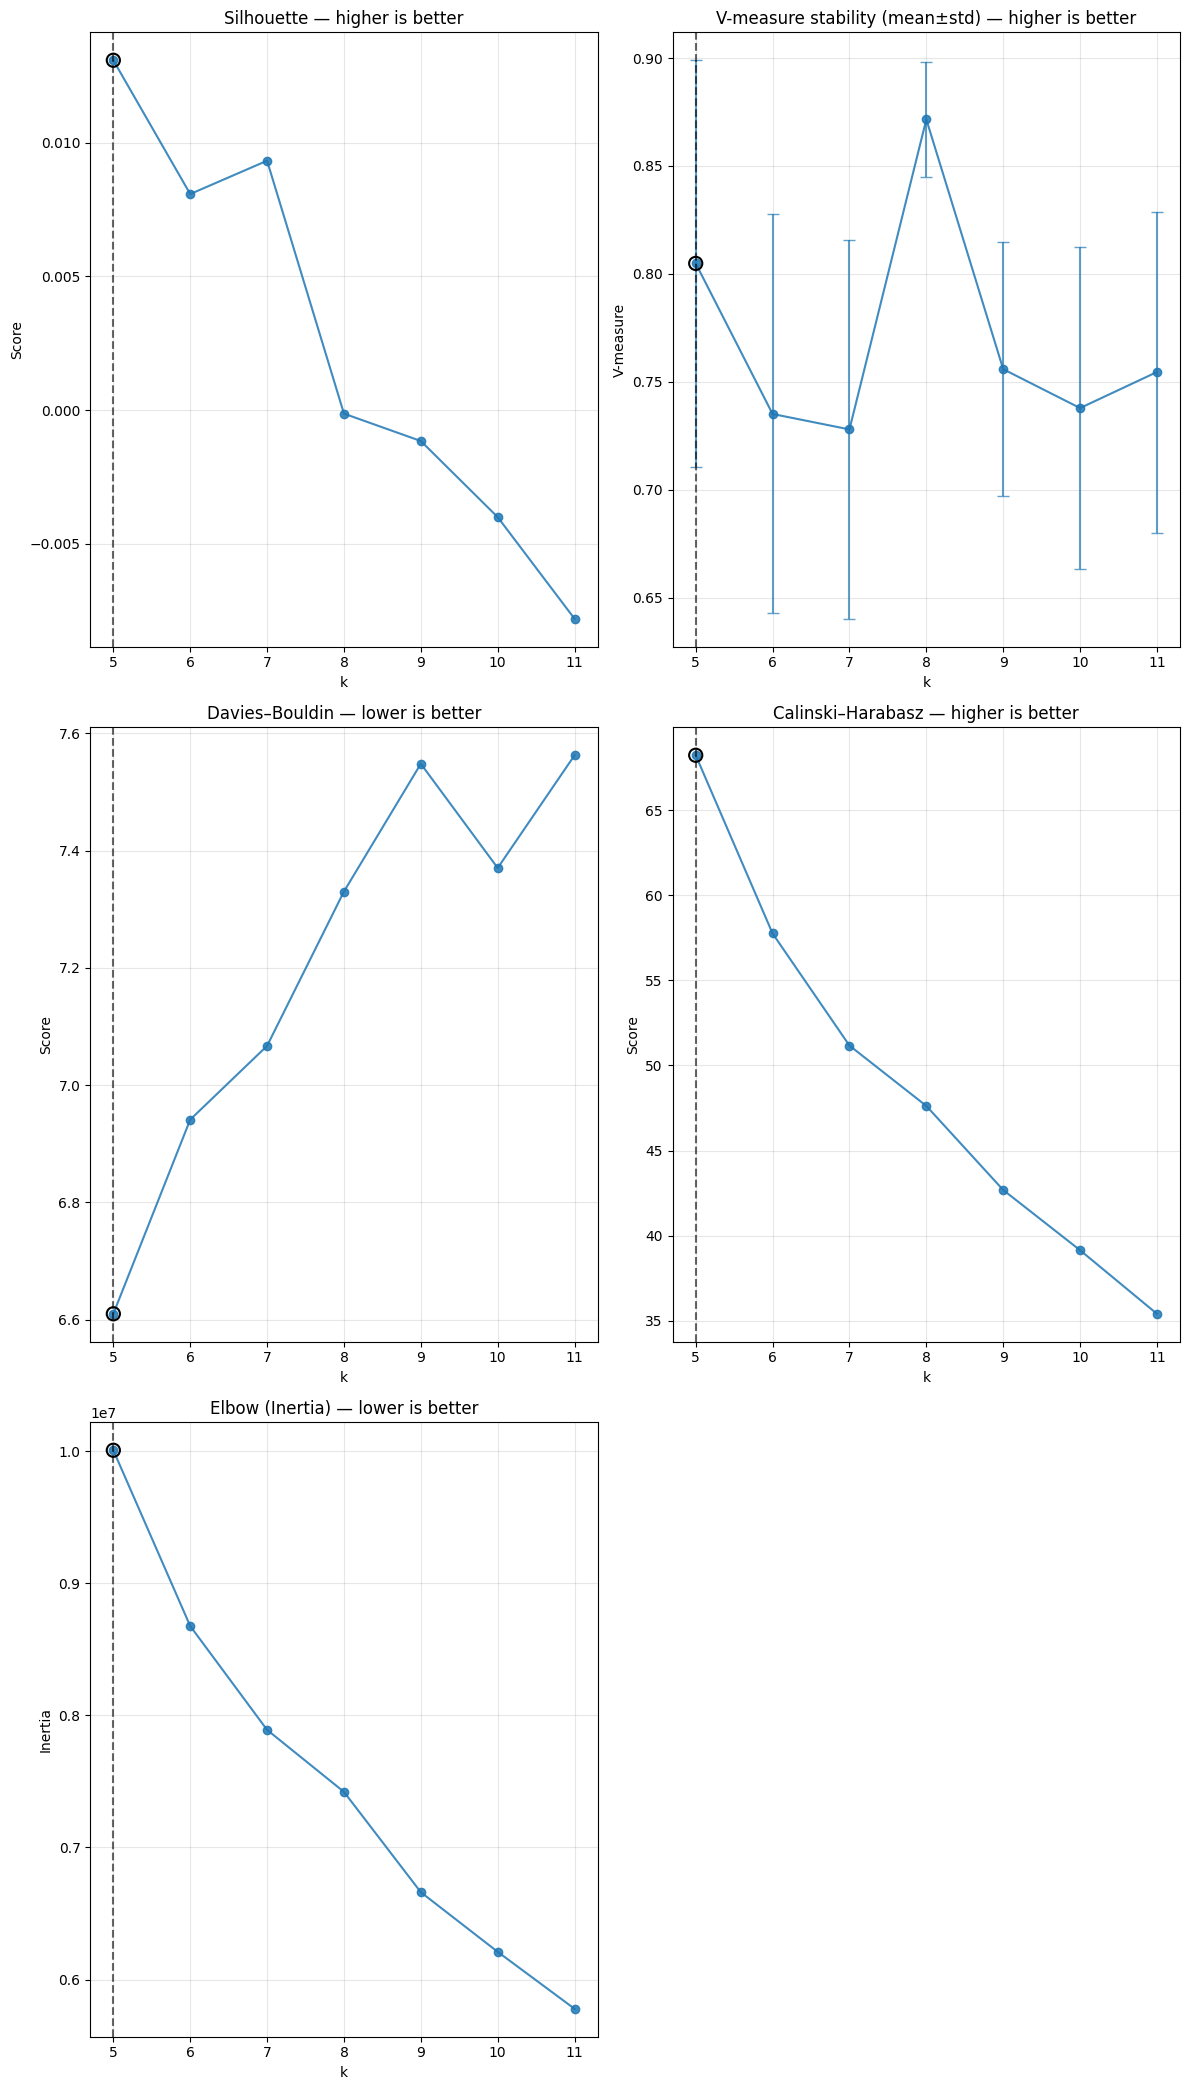

In [217]:
plot_cluster_selection(scores, cands, k_star)

And a distribution of the resulting segments:

K-Means segment sizes:
 0    1190
1    1155
2     698
3     277
4     218
Name: count, dtype: int64


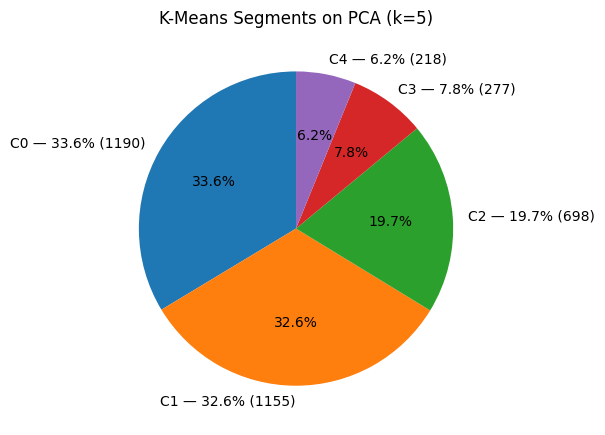

In [218]:
# put the labels into a specific copy of the original cleaned dataset for further processing
LABELS_KMEANS = df_pre_conversion.copy()
LABELS_KMEANS['SEGMENT'] = labels

# look at how many records are in each segment
k_counts = pd.Series(labels).value_counts().sort_index()
print("K-Means segment sizes:\n", k_counts)

# produce a piechart
plt.figure(figsize=(6,6))
sizes = (k_counts/len(df)*100).round(1)
labels_txt = [f"C{i} — {sizes.iloc[i]}% ({k_counts.iloc[i]})" for i in range(len(k_counts))]
plt.pie(k_counts, labels=labels_txt, autopct='%1.1f%%', startangle=90)
plt.title(f"K-Means Segments on PCA (k={k_star})")
plt.tight_layout(); plt.show()

Additionally, I wanted to showcase the separation of clusters on a 2D point graph:

1) Using PCA dimensionality reduction

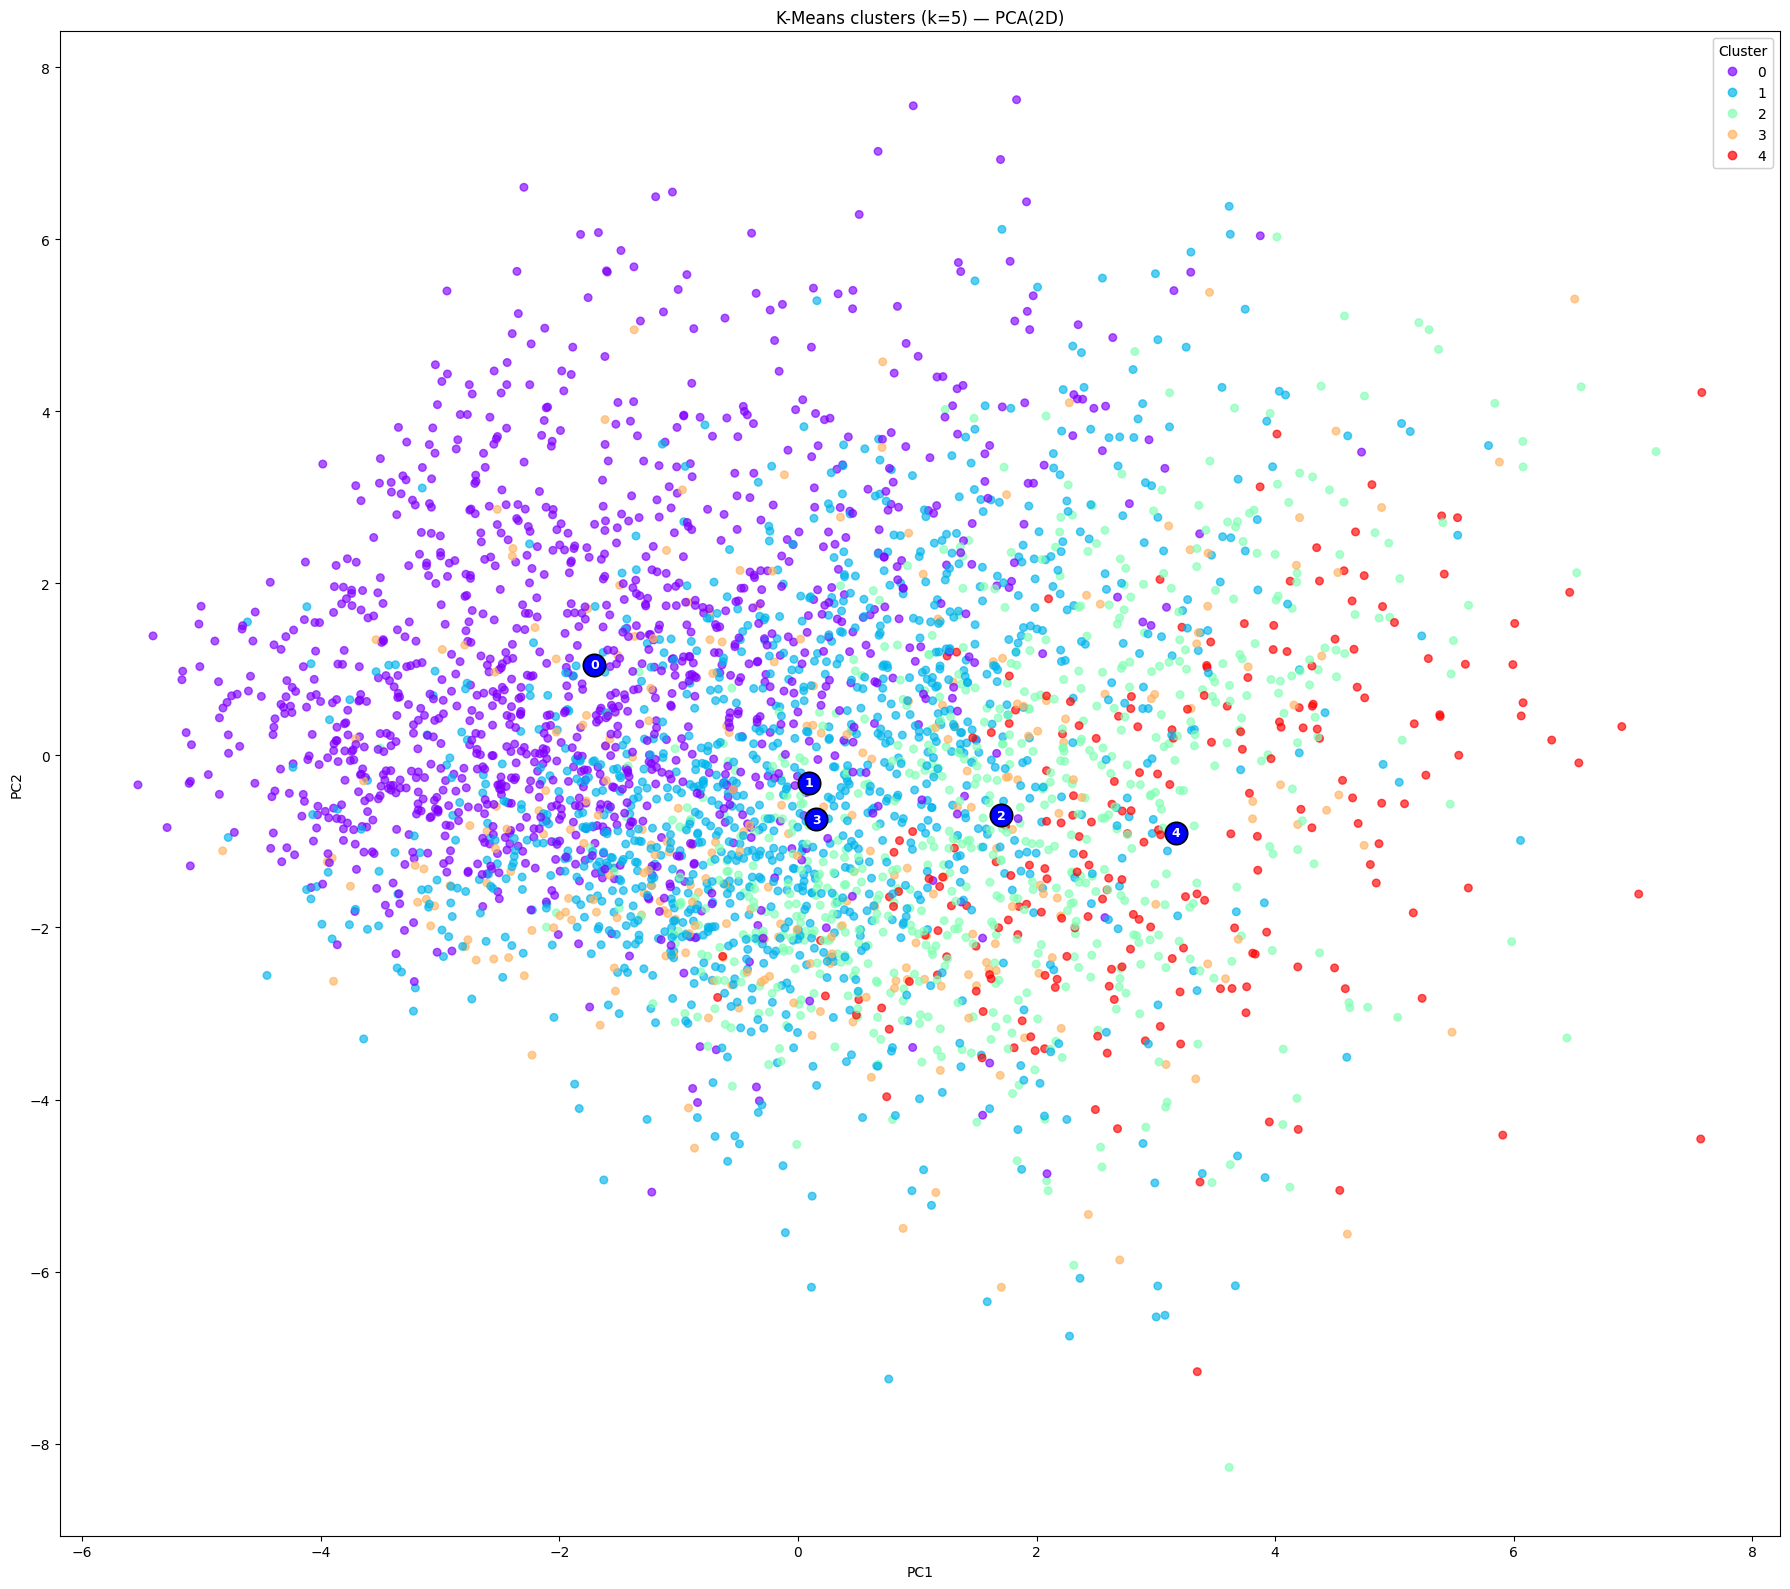

In [240]:
labels = LABELS_KMEANS['SEGMENT'].values
uniq = np.unique(labels)
k_val  = int(k_star) if 'k_star' in globals() else len(np.unique(labels))

pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(FEAT)
centers_2d = np.vstack([Z[labels==c].mean(axis=0) for c in uniq])

plt.figure(figsize=(18,16))
sc = plt.scatter(Z[:,0], Z[:,1], c=labels, s=30, alpha=0.65, cmap="rainbow")

# centroids as big blue dots
plt.scatter(centers_2d[:,0], centers_2d[:,1], s=260, marker='o',
            color='blue', edgecolor='black', linewidths=1.2)
for i, (x, y) in enumerate(centers_2d):
    plt.text(x, y, str(i), color='white', ha='center', va='center',
             fontsize=9, weight='bold')

legend = plt.legend(*sc.legend_elements(), title="Cluster", loc='best', frameon=True)
plt.gca().add_artist(legend)

plt.title(f"K-Means clusters (k={k_val}) — PCA(2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()

4 out of the 5 segments we can observe are well-defined and almost don’t overlap, although one of the clusters is spread through the entire graph. Alas, that is mostly due to the limitations of dimension reduction.

2) Using UMAP (will show the separation a lot better + I also present the area containing 95% of the data from each cluster)

In [241]:
import umap

labels = np.asarray(labels)
k_val  = int(k_star) if 'k_star' in globals() else len(np.unique(labels))

Z, method = None, None
reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.05,
    n_components=2,
    metric='euclidean',
    random_state=42,
    target_metric='categorical'
)
Z = reducer.fit_transform(FEAT, y=labels)
method = "UMAP"

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


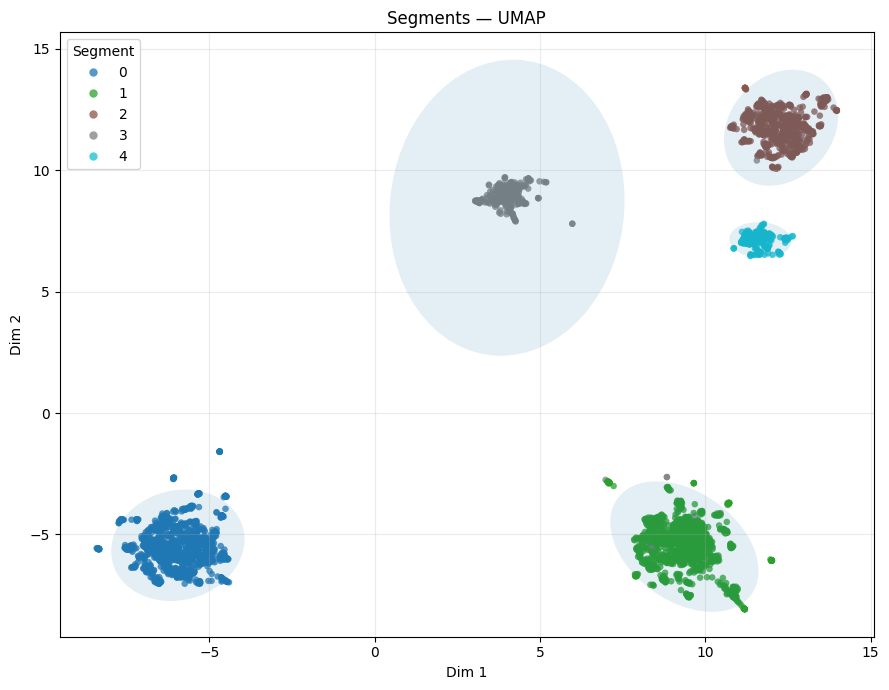

In [242]:
from matplotlib.patches import Ellipse

def add_ellipses(ax, P, y):
    chi2_95 = 5.991
    for g in np.unique(y):
        G = P[y==g]
        mu = G.mean(0)
        cov = np.cov(G, rowvar=False)
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:,order]
        ang = np.degrees(np.arctan2(vecs[1,0], vecs[0,0]))
        w, h = 2*np.sqrt(np.maximum(vals, 1e-9) * chi2_95)
        ax.add_patch(Ellipse(mu, w, h, angle=ang, alpha=0.12))

plt.figure(figsize=(9,7))
sc = plt.scatter(Z[:,0], Z[:,1], c=labels, s=22, alpha=0.75, cmap='tab10', linewidths=0)

add_ellipses(plt.gca(), Z, labels)
plt.title(f"Segments — {method}")
plt.xlabel("Dim 1"); plt.ylabel("Dim 2"); plt.grid(alpha=.25)
plt.legend(*sc.legend_elements(), title="Segment", loc='best')
plt.tight_layout(); plt.show()


Compared to PCA, one can more clearly see that the clusters, indeed, exist and have reasons to be separated as such.

## RFM

Now, onto the quantile method. This did not require approaches quite as sophisticated as KMeans, but the number of segments, as well as initial variables, still had to be figured out.


---

First up - let's take a look at the correlation triangle, like in the seminar:

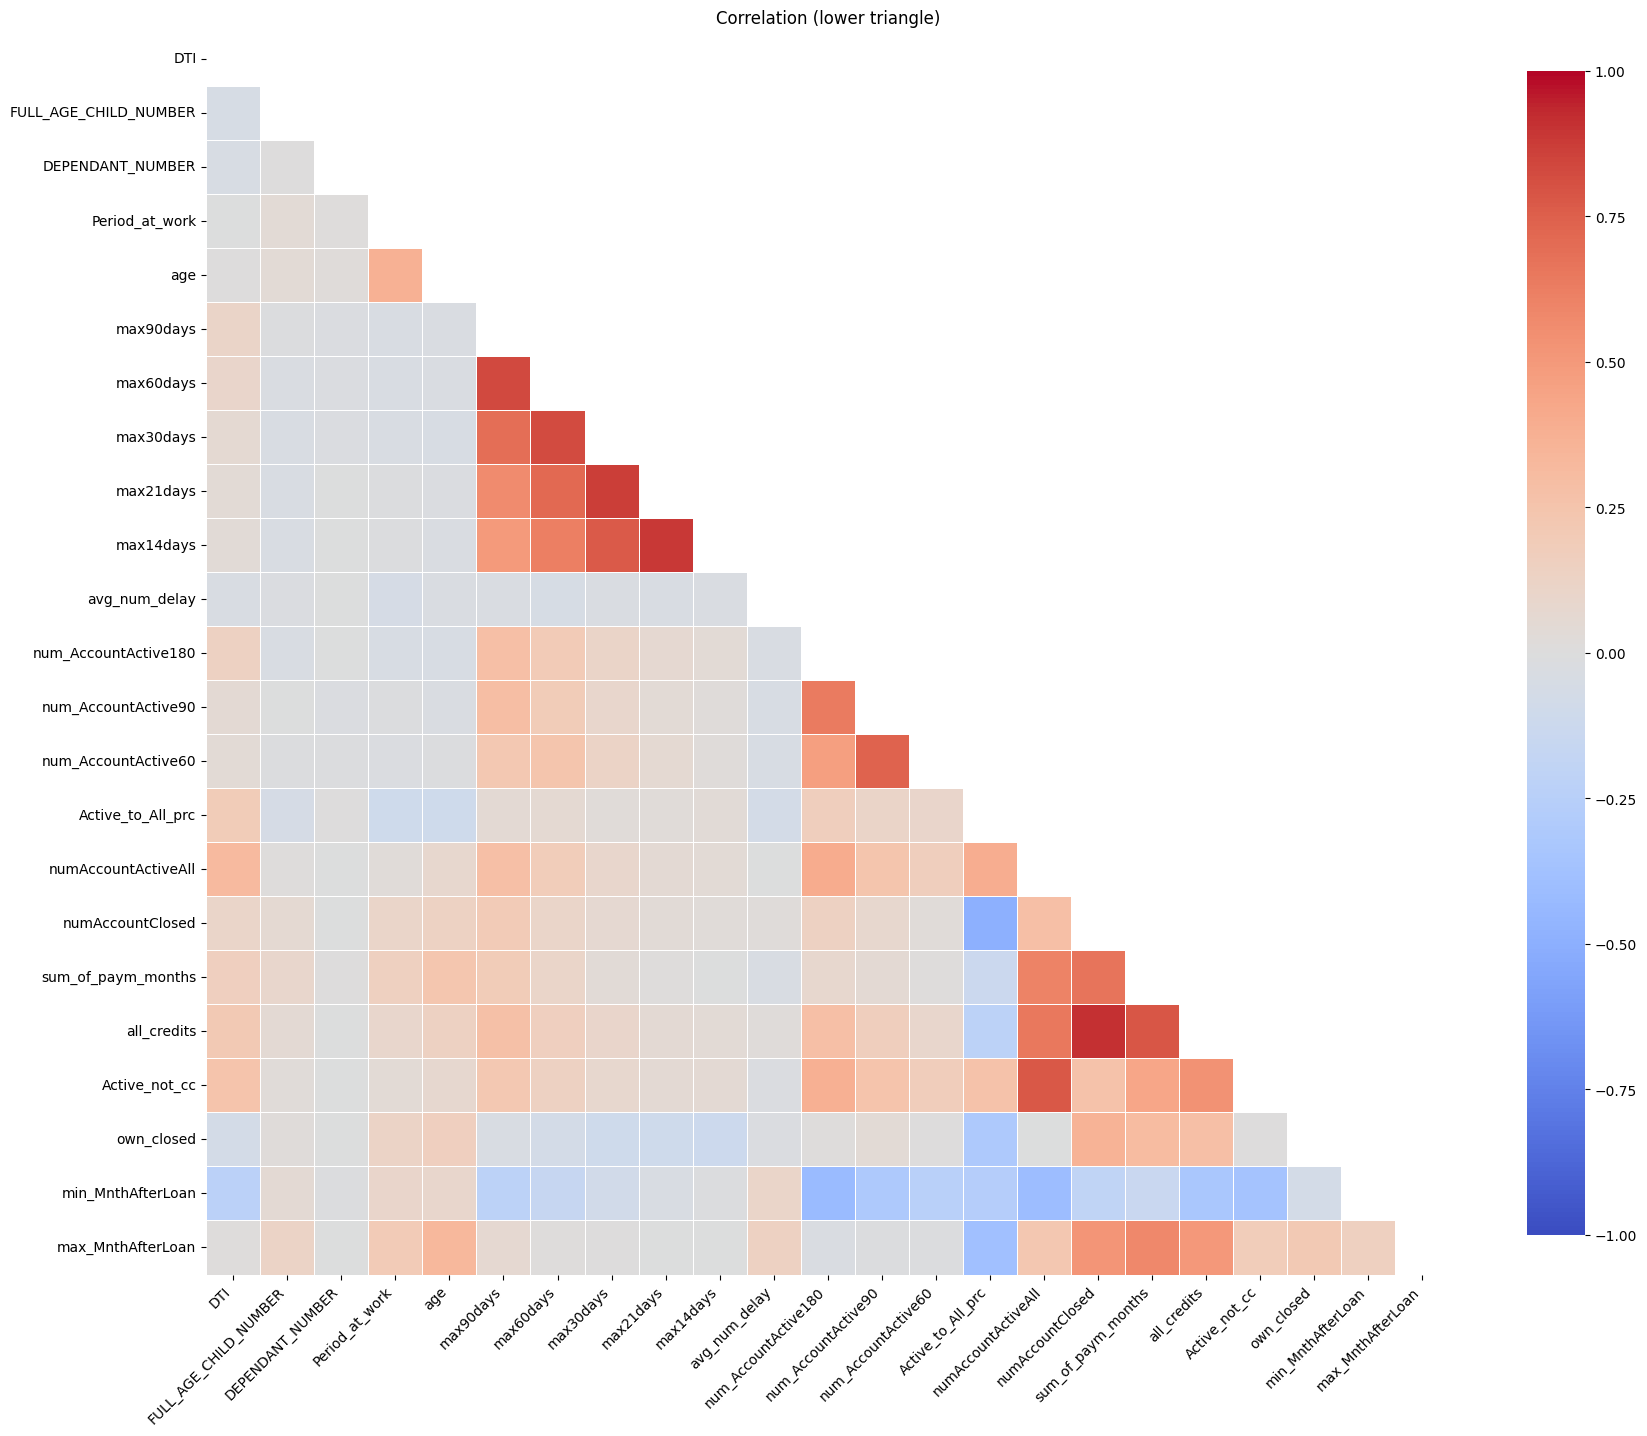

In [222]:
X = df.copy()
sub  = X.loc[:, non_cats]
corr = sub.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
annot_flag = corr.shape[0] <= 20
plt.figure(figsize=(0.6*corr.shape[0] + 4, 0.6*corr.shape[0] + 2))
sns.heatmap(
    corr, mask=mask, vmin=-1, vmax=1, center=0, cmap="coolwarm",
    square=True, linewidths=.5, linecolor='white',
    cbar_kws={'shrink': .8}, annot=annot_flag, fmt=".2f"
)
plt.title("Correlation (lower triangle)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Judging by the variables with most negative/positive correlation, as well as using business logic, it would make the most sense to do the following:
- Set Recency as min_MnthAfterLoan (how recent was the last time the client was given a loan)
- Set Frequency as numAccountActiveAll (the number of currently active accounts, for the lack of a better frequency variable)
- Set Monetary as sum_of_paym_months (the current number of monthly payments)

Convert the metrics into a 5-point scale for RFM (this scale was chosen instead of a more prominent 3-point scale in order to make it easier and more logical to get at least 5 segments in the result [5^3 is divisible by 5, whereas 3^3 is not])

In [223]:
R_col, F_col, M_col = 'min_MnthAfterLoan', 'numAccountActiveAll', 'sum_of_paym_months'

def qcut_1to5(s, higher_is_better=True):
    r = s.rank(method='first')
    if not higher_is_better:
        r = -r
    try:
        return pd.qcut(r, 5, labels=[1,2,3,4,5]).astype(int)
    except ValueError:
        return pd.cut(r, bins=5, labels=[1,2,3,4,5], include_lowest=True).astype(int)

# 5: most recent (=> invert), 5: most frequent, 5: highest monetary
X['R'] = qcut_1to5(X[R_col], higher_is_better=False)
X['F'] = qcut_1to5(X[F_col], higher_is_better=True)
X['M'] = qcut_1to5(X[M_col], higher_is_better=True)


Let's now name the segments:
- VIP - those who have frequent, recent and pricey payments (all >= 4)
- Core - those who have at least average (=3) values for all the metrics, yet are not in VIP
- Potential - those who have made recent payments, yet those were lacking in either frequency or monetary value
- At risk - those who have not made any payments in a while (<= 2), yet whose payments are either semi-frequent or at least somewhat valuable in monetary terms.
- Churn - everyone else

- VIP are the customers we want to keep. We don't need to ask them to spend more or take out loans more often, we just want to stop them from potentially moving somewhere else
- Core are the customers we still want to keep, maybe sometimes incentivising them to be more active
- Potential are those who have potential, being somewhat recent clients, yet do not spend as much or as frequently as we want
- At risk are those who used to be our core, but for some reason haven't taken out a loan in a while
- Finally, churn (traditionally) contains clients lacking in all aspects simultaneously

Time to do segmentation + add the data to the original df for further research:

In [224]:
seg = np.full(len(X), 'Churn', dtype=object)

vip = (X['R']>=4) & (X['F']>=4) & (X['M']>=4)
core = (~vip) & (X[['R','F','M']].min(axis=1)>=3)
potential = (~vip) & (~core) & (X['R']>=4) & ((X['F']<=3) | (X['M']<=3))
atrisk = (~vip) & (~core) & (~potential) & (X['R']<=2) & ((X['F']>=3) | (X['M']>=3))

seg[vip] = 'VIP'
seg[core] = 'Core'
seg[potential] = 'Potential'
seg[atrisk] = 'At-Risk'

X['SEGMENT'] = pd.Categorical(seg, categories=['VIP','Core','Potential','At-Risk','Churn'], ordered=True)
LABELS_RFM = df_pre_conversion.copy()
LABELS_RFM['SEGMENT'] = pd.Categorical(seg, categories=['VIP','Core','Potential','At-Risk','Churn'], ordered=True)

print(X['SEGMENT'].value_counts(dropna=False))

SEGMENT
Churn        899
At-Risk      876
Core         677
Potential    592
VIP          494
Name: count, dtype: int64


Now, let's observe the means and the medians for each of the segments:

In [225]:
order = ['VIP','Core','Potential','At-Risk','Churn']

rfm_mean = (X.groupby('SEGMENT')[['R','F','M']]
              .mean().round(2).reindex(order))
rfm_median = (X.groupby('SEGMENT')[['R','F','M']]
                .median().astype(int).reindex(order))

print("RFM (5 segments) — means:\n", rfm_mean)
print("\nRFM (5 segments) — medians:\n", rfm_median)


RFM (5 segments) — means:
               R     F     M
SEGMENT                    
VIP        4.52  4.66  4.57
Core       3.73  3.99  3.72
Potential  4.49  2.61  1.80
At-Risk    1.58  2.93  3.72
Churn      2.03  1.67  1.69

RFM (5 segments) — medians:
            R  F  M
SEGMENT           
VIP        5  5  5
Core       3  4  3
Potential  4  2  2
At-Risk    2  3  4
Churn      2  1  2


/tmp/ipython-input-1473172897.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_mean = (X.groupby('SEGMENT')[['R','F','M']]
/tmp/ipython-input-1473172897.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_median = (X.groupby('SEGMENT')[['R','F','M']]


And look at the pie chart

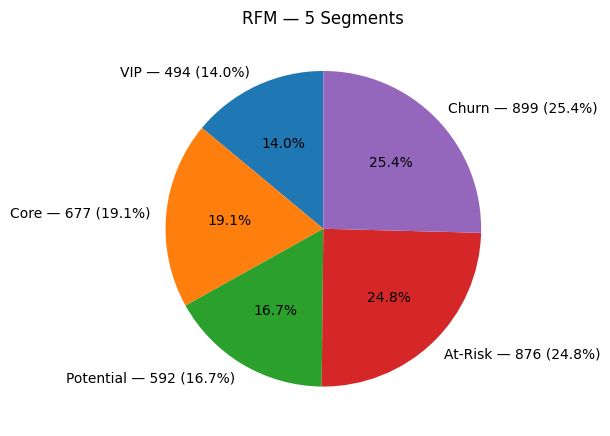

In [226]:
cnt = X['SEGMENT'].value_counts().reindex(order)
labels = [f"{k} — {v} ({v/len(df)*100:.1f}%)" for k,v in cnt.items()]
plt.figure(figsize=(6,6))
plt.pie(cnt.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("RFM — 5 Segments")
plt.tight_layout()
plt.show()

As a result, 5 segments of an almost equal size were obtained, the largest of them (1/4 of the data), unfortunately, being Churn.

And obtain a heatmap version of the mean table from above:

/tmp/ipython-input-257233250.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = (X.groupby(seg_col)[['R','F','M']]


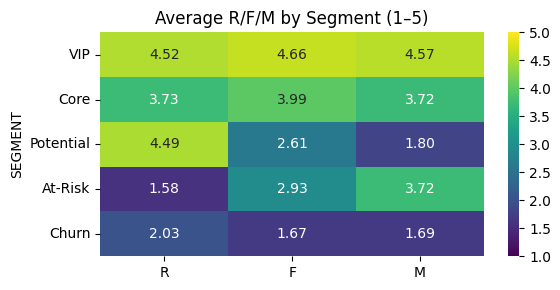

In [227]:
seg_col = 'SEGMENT'
order   = ['VIP','Core','Potential','At-Risk','Churn']

present = [s for s in order if s in X[seg_col].astype(str).unique()]
avg = (X.groupby(seg_col)[['R','F','M']]
        .mean()
        .reindex(present))

plt.figure(figsize=(6, max(3, 0.4*len(avg))))
sns.heatmap(avg, annot=True, fmt=".2f", vmin=1, vmax=5, cmap="viridis")
plt.title("Average R/F/M by Segment (1–5)")
plt.tight_layout(); plt.show()

# 3. Customer profiles

Before building customer profiles, it would be nice to have a full table-based view of everything to do with each segment

A function for finding by-segment means for numericals and medians for categoricals:

In [250]:
def _is_boolean(series):
        if series.dtype == bool:
            return True
        s_num = pd.to_numeric(series, errors='coerce')
        vals = pd.unique(s_num.dropna())
        return len(vals) > 0 and set(vals).issubset({0.0, 1.0})

def _mode_value(s):
    vc = s.dropna().value_counts()
    return vc.index[0] if len(vc) else np.nan

def by_segment_summary(df, cats, non_cats, seg_col='SEGMENT', round_to=3,
                     long=True, stat_order=('mean','mode')):
    g = df.groupby(seg_col, dropna=False)

    # means for numeric (non_cats)
    mean_non = g[non_cats].mean(numeric_only=True) if non_cats else pd.DataFrame(index=g.size().index)

    cats = list(cats) if cats else []
    boolean_cols, other_cat_cols = [], []
    for c in cats:
        try:
            if _is_boolean(df[c]):
                boolean_cols.append(c)
            else:
                other_cat_cols.append(c)
        except Exception:
            other_cat_cols.append(c)

    # means for boolean categoricals
    if boolean_cols:
        boolean_means = {}
        for c in boolean_cols:
            s = df[c]
            if s.dtype == bool:
                s_num = s.astype(float)
            else:
                s_num = pd.to_numeric(s, errors='coerce').where(lambda x: x.isin([0,1]))
            boolean_means[c] = g[c].apply(lambda col: pd.to_numeric(col, errors='coerce')
                                                       .clip(0,1).mean())
        mean_bool = pd.concat(boolean_means, axis=1)
        mean_bool.columns = pd.Index(mean_bool.columns, name=None)
    else:
        mean_bool = pd.DataFrame(index=g.size().index)

    # modes for non-boolean categoricals
    mode_cat = (g[other_cat_cols].agg(_mode_value)
                if other_cat_cols else pd.DataFrame(index=g.size().index))

    pieces = {}
    mean_parts = []
    if not mean_non.empty:
        mean_parts.append(mean_non)
    if not mean_bool.empty:
        mean_parts.append(mean_bool)
    if mean_parts:
        mean_all = pd.concat(mean_parts, axis=1)
        pieces['mean'] = mean_all
    if not mode_cat.empty:
        pieces['mode'] = mode_cat

    out = pd.concat(pieces, axis=1)
    try:
        num_mask = out.applymap(lambda x: isinstance(x, (int, float, np.floating))).any(axis=0)
        out.loc[:, num_mask] = out.loc[:, num_mask].astype(float).round(round_to)
    except Exception:
        pass

    return out

In [257]:
def print_by_segment_wide(df, cats, non_cats, seg_col='SEGMENT',
                          round_to=3, na_str='', bool_as_pct=False):
    out = by_segment_summary(df, cats, non_cats, seg_col=seg_col,
                             round_to=round_to, long=False)

    if isinstance(out, tuple):
        out = out[0]
    if not isinstance(out.columns, pd.MultiIndex):
        raise ValueError("by_segment_summary must return MultiIndex columns like ('mean', col) / ('mode', col).")

    seg_names = list(out.index)

    cats = list(cats) if cats else []
    boolean = [c for c in cats if c in df.columns and _is_boolean(df[c])]
    non_bool = [c for c in cats if c not in boolean]

    tbls = {}

    # CATEGORICALS
    has_mean = 'mean' in set(out.columns.get_level_values(0))
    has_mode = 'mode' in set(out.columns.get_level_values(0))

    if cats and (has_mean or has_mode):
        cats_tbl = pd.DataFrame(index=cats, columns=seg_names, dtype=object)
        if has_mean and boolean:
            mean_block = out['mean']
            for c in boolean:
                if c in mean_block.columns:
                    s = mean_block[c].astype(float)
                    vals = (s * 100.0 if bool_as_pct else s).round(round_to)
                    cats_tbl.loc[c, seg_names] = vals.reindex(seg_names).to_numpy()

        if has_mode and non_bool:
            mode_block = out['mode']
            for c in non_bool:
                if c in mode_block.columns:
                    vals = mode_block[c].reindex(seg_names)
                    cats_tbl.loc[c, seg_names] = vals.to_numpy()

        cats_tbl = cats_tbl.replace({np.nan: na_str})
        headers = ['variable names\\seg names'] + [str(s) for s in cats_tbl.columns]
        rows = [[idx] + [cats_tbl.loc[idx, s] for s in cats_tbl.columns] for idx in cats_tbl.index]
        print("|CATEGORICALS|")
        print(tabulate(rows, headers=headers, tablefmt='orgtbl'))

    # NUMERICALS
    if non_cats and ('mean' in set(out.columns.get_level_values(0))):
        nums_block = out['mean']
        nums_tbl = nums_block[ [c for c in non_cats if c in nums_block.columns] ].T
        nums_tbl = nums_tbl.reindex([c for c in non_cats if c in nums_tbl.index])
        nums_tbl = nums_tbl.replace({np.nan: na_str})
        headers = ['variable names\\seg names'] + [str(s) for s in nums_tbl.columns]
        rows = [[idx] + [nums_tbl.loc[idx, s] for s in nums_tbl.columns] for idx in nums_tbl.index]
        print("|NUMERICALS|")
        print(tabulate(rows, headers=headers, tablefmt='orgtbl'))

## RFM

In [258]:
print_by_segment_wide(LABELS_RFM, cats, non_cats)

/tmp/ipython-input-2057448080.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(seg_col, dropna=False)
/tmp/ipython-input-2057448080.py:65: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_mask = out.applymap(lambda x: isinstance(x, (int, float, np.floating))).any(axis=0)


|CATEGORICALS|
| variable names\seg names   | VIP                                   | Core                                | Potential                           | At-Risk                               | Churn                               |
|----------------------------+---------------------------------------+-------------------------------------+-------------------------------------+---------------------------------------+-------------------------------------|
| INCOME_BASE_TYPE           | Форма банка (без печати работодателя) | Поступление зарплаты на счет        | Поступление зарплаты на счет        | Форма банка (без печати работодателя) | Поступление зарплаты на счет        |
| CREDIT_PURPOSE             | Ремонт                                | Ремонт                              | Ремонт                              | Ремонт                                | Ремонт                              |
| INSURANCE_FLAG             | 0.595                                 | 0.614         

### Segment 1: VIP / Engaged premium clients

Clients in this group, on average:
- Tend to be middle-aged (37 y.o.) men with a child, who have been at their new workplace for ~64 days by now
- They receive salary via a bank form
- They extensively use their account, showcased by them having ~10 credits, 4 of which are active.
- They rank in payments of 152 each month, successfully close the overwhelming majority of their loans, and they have at least one active loan opened over the last 6 months


In terms of risk:
- They have an average Debt-to-Income ratio of 0.437, which means that their income is just twice their debt (the worst DTI of the segments)
- Delinquencies in terms of payments are quite common, boasting a score of 79.4%. Yet there’s only a 17% chance that they will remain unpaid for over a month, and only 6% of them delay payments
- The majority lack collateral, but do have insurance

Thus, these clients are important and have good financial activity, yet are likely to carry higher risks and delay payments (which is critical due to their payments also being the largest on average)


As a result, the bank ought to keep their high value while trying to control their high risk. Additional offers could be provided, such as bundles (credit card + insurance + etc) while also setting stricter limits on delays, as well as issuing early warnings about incoming delays to the customers who are the most prone to them.


Variables to pay attention to in this segment: monthly payments, 30/60/90 day delays over the last year, DTI

### Segment 2: Core / Reliable mainstay

Clients in this group, on average:
- Tend to be middle-aged (35.6 y.o.) married men, who have been at their new workplace for ~54 days by now
- They get salary sent straight to their bank account
- Their usage is less extensive: ~7 credits, 3 of which are currently active.
- They pay 2/3 of what VIP pays each month - ~100, successfully close only 0.80 of their loans, and they have, on average 0.45 active loans opened over the last 6 months


In terms of risk:
- They have an average Debt-to-Income ratio of 0.432, which means that their income is also appx. twice their debt
- Delinquencies in terms of payments are less common, with a score of 67.1%. There’s a 14% chance that they will remain unpaid for over a month, and 6% of them delay payments
- They’re even less likely than VIP to have collateral, but more likely to have insurance

While also having relatively high financial activity, this group carries less risk than VIP.

Therefore, while there’s room for growth in this segment, the bank still has to pursue it safely. E.g., they could be sold adjacent products to get them more interested in the ecosystem of the bank. They could also be provided various loyalty rewards in order to transfer some of the members to the VIP segment. In that regard, their loan limit could also be periodically increased after streaks of successful on-time payments.

Variables to pay attention to in this segment: active credits divided by all credits, 30/60/90 day delays over the last year, on-time payments

### Segment 3: Potential / Younger professionals

Clients in this group, on average:
- Are early 30s (~33 y.o.) married women, who have been at their new workplace for ~44 days
- They also get salary sent straight to their bank account
- Their usage is relatively tame: ~4 credits, 2 of which are active.
- They pay ~32.5 each month, successfully close just 0.529 of their loans, yet, on average, they have 0.81 active loans opened over the last 6 months, which is larger than that of Core


In terms of risk:
- They have the lowest DTI in the top-3: 0.382
- Only delay their payments in 35.8% of cases. There’s just a 7% chance that they will delay one for over a month
- Only 1/5 of them have collateral, but the majority has insurance

Despite significantly lower payments and closures, this group is engaged and not prone to significant delays.

The bank, thus, has to keep an eye on this specific group, as it is relatively easy to see them being converted to either of the previous two segments in the long term. Cashback and various onboarding offers could be introduced in order to nurture the relationship with the bank. Several improved micro-loan incentives could also be added, as that seems to be the primary use case of the bank by this group.

Variables to pay attention to in this segment: all_credits, payment growth, 30/60/90-day delays

### Segment 4: At-risk / Recently inactive, yet acquainted

Clients in this group, on average:
- 37.4 y.o. men with children (the most likely group to have a child), who have been at their new workplace for just over 2 months
- They obtain their salary via a bank form
- Their usage is generally average: ~6 credits, just 2 of which are active.
- However, they pay ~102.1 each month and successfully close 0.872 of their loans. This signifies that they used to be in the Core sector, but have dwindled in terms of activity, having opened no loans over the past 6 months, with their last loan being opened **23.5** months ago

In terms of risk:
- They have an even lower DTI - 0.379
- Often delay their payments (66.9% cases). There’s 16.2% chance of a delay of over 30 days, and 7% of them delay their payments, making this particular part of risk assessment almost as significant as that of VIP
- 40% of them have collateral and 58% have insurance, which is also similar to VIP.


In spite of the similarities to Core and VIP, this group is an active risk to the bank and has to be tackled thoroughly.

One potential approach is to win back these clients by offering them due-day shifts and reducing interest. However, autopay should be required and no new credit should be approved until a pattern of on-time payments emerges. After “reactivation”, they should be incentivised to go after small, low-risk loans first.

Variables to pay attention to in this segment: recent activity over the last 60/90/180 days, average payment delay

### Segment 5: Churn / Small wallet AND low engagement

Clients in this group, on average:
- 34.3 y.o. women with children, who have been at their new workplace for 51 days
- They get their salary sent to their bank account
- Their usage is nearly non-existent: ~2-3 credits, less than 1 of which is active (=> some of them do not have active accounts).
- They only pay 30.2 each month and successfully close less than half of their loans. Additionally, there’s no recent activity whatsoever

In terms of risk:
- They have the lowest DTI - 0.342
- Rarely delay their payments (34.2% cases). There’s only an 8.6% chance of a delay of over 30 days, and 6% of them delay their payments. While this is good, it could be linked to them having less payments overall
- Only 20.7% of them have collateral, but 61.5% have insurance

This is a segment which would prove to be barely profitable to pursue, but a few “nudges” could be attempted nonetheless.

The bank could attempt to reinitiate contact via push/e-mail (possibly also SMS, but that may be too expensive). They could also offer things like fee-free periods and cashback. If none of that would reactivate the client, it would be best to limit communications to a minimum from then onwards.

Variables to pay attention to in this segment: activity over the last 60 days, recency of the latest transaction

## Unsupervised

In [262]:
print_by_segment_wide(LABELS_KMEANS, cats, non_cats)

|CATEGORICALS|
| variable names\seg names   | 0                                   | 1                                   | 2                                     | 3                                     | 4                                     |
|----------------------------+-------------------------------------+-------------------------------------+---------------------------------------+---------------------------------------+---------------------------------------|
| INCOME_BASE_TYPE           | Поступление зарплаты на счет        | Поступление зарплаты на счет        | Форма банка (без печати работодателя) | Форма банка (без печати работодателя) | Форма банка (без печати работодателя) |
| CREDIT_PURPOSE             | Ремонт                              | Ремонт                              | Ремонт                                | Ремонт                                | Ремонт                                |
| INSURANCE_FLAG             | 0.641                               | 0.577   

/tmp/ipython-input-2057448080.py:65: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_mask = out.applymap(lambda x: isinstance(x, (int, float, np.floating))).any(axis=0)


### Segment 0: Young & New

Clients in this group, on average:
- Tend to be young (31.8 y.o.) married women who have been at their new workplace for just over a month so far
- They receive salary to their bank account
- They use their account lightly, having 3 total credits, 1.5 of which are active
- They have low monthly payments of ~27, successfully close less than half of their loans

In terms of risk:
- They have a low-ish DTI of 0.376
- Delinquency is uncommon in this group: 35.5%. Moreover, there’s only a 4.9% chance that they will not pay their interest for over a month
- Less than 1/5 of them have collateral, but 64.1% has insurance

As can be seen, these clients are early-stage, low-revenue but already reasonably active and mostly lack risk. They bring average short-term value while having high future potential.


Therefore, the bank should focus on growth and habit formation: bundling (debit+credit), autopay activation, behavior-based limit ramps, simple offers. However, access to higher credit tiers should probably be restricted before an on-time payment streak emerges.

Variables to pay attention to in this segment: Active_to_All_prc, num_AccountActive180/90/60, sum_of_paym_months, first 30-day delay, DTI.


### Segment 1: Growing middle segment with arrears

Clients in this group, on average:
- Tend to be middle-aged (35.6 y.o.) men with children, who have been at their new workplace for ~49 days by now
- They get salary sent straight to their bank account
- Their usage is medium: ~5 credits, 2 of which are currently active.
- They have moderate payments of ~63, successfully close 0.675 of their loans

In terms of risk:
- They have an average DTI of 0.381
- Delinquencies in terms of payments are semi-common - 58.9%. There’s a 15.9% chance that their loans will remain unpaid for over a month
- A third of them has collateral, but two thirds have insurance

This group has a higher-than-average payment rate, yet already shows signs of delays here and there. Therefore, the bank should take measures to somehow minimise said delays.

E.g., align due dates with a client’s pay day, require autopay for any change of limit, and convert existing balances to structured installments. Return access to some of the more sensitive (to delays) features after a streak of on-time payments.

Variables to pay attention to in this segment: avg_num_delay, 30/60/90-day delays (lifetime), num_AccountActive180, sum_of_paym_months, DTI.

### Segment 2: Average risk, High reward

Clients in this group, on average:
- Older middle aged (~37.2 y.o.) men with children, who have been at their new workplace for ~49 days
- They get salary via a bank form
- Their usage is extensive: ~8.48 credits, 3 of which are active.
- Incredibly, they pay ~138 each month, successfully close 1.11 of their loans, making them highly rewarding for the bank

In terms of risk:
- They have one of the highest DTI out of the segments - 0.410
- But they delay their payments in 77.2% of cases, with a worrisome 18.8% chance that they will delay a payment for over a month
- 44.3% of them have collateral, 60% has insurance

This group drives seriously strong revenue for the bank, yet carries over the problem of heightened risk.

The bank should, thus, balance increasing value and control: offer bundles while simultaneously introducing dynamic limits and early warnings for emerging arrears, as well as leveraging collateral, which this group has more of than others.

Variables to pay attention to in this segment: sum_of_paym_months, all_credits / numAccountActiveAll, 30/60/90-day delays, dlq_exist, DTI.

### Segment 3: Disengaged legacies

Clients in this group, on average:
- Are older (the oldest of all segments), 43.7 y.o. women with children, who have been at their new workplace for approximately 190 days (the longest)
- They obtain their salary via a bank form
- They, unlike every other segment, are employed in an “Other” industry instead of “Sales”
- Their usage is generally average: ~5 credits, just 2 of which are active
- They pay a moderate ~77 each month and successfully close 0.809 of their loans

In terms of risk:
- They have a low DTI - 0.38
- Sometimes delay their payments, sometimes do not (50.5% cases). There’s only a 9% chance of a delay of over 30 days
- A third of them has collateral, two thirds have insurance

While this group provides higher than average revenue to the bank and is the most experienced, its engagement is not as high as the bank would probably like it to be.

It could, for example, try to reactivate these accounts with targeted offers and cashback. Then, once these account have been reactivated to a more appropriate degree, other methods could be employed to generate more revenue.

Variables to pay attention to in this segment: num_AccountActive180/90/60, Active_to_All_prc, sum_of_paym_months, first 30-day delay, DTI.

### Segment 4: High-risk power users

Clients in this group, on average:
- Mature (40.4 y.o.) men with children, who have been at their new workplace for 70 days
- They get their salary sent to their bank account
- Their usage is the largest between segments: ~12-13 credits, 5 of which are active.
- They pay a whopping 257 each month and successfully close 1.275 of their loans.

In terms of risk:
- They have the actual highest DTI - 0.432
- Incredibly often delay their payments (91.3% cases). There’s a serious **1 in 5** chance of a delay of over 30 days
- Over half of them have both collateral and/or insurance

This is both an extremely good and an extremely bad segment for the bank. On the one hand, it brings in the most revenue. On the other hand, these clients almost never bring in the money on time.

This is not good for the bank, as it needs loan money to manage other items in its portfolio, and these payments are by far the most impactful. Therefore, the bank should most likely tighten the restrictions, aggressively warning the client of late payments and decreasing the level of tolerance to said late payments.

Variables to pay attention to in this segment: sum_of_paym_months, all_credits / numAccountActiveAll, 30/60/90-day delays (lifetime), dlq_exist, DTI

# 4. Conclusion

Based on personal observations, it seems as if out of the two segmentation methods, RFM is better for quickly assessing business needs and categorising large groups of customers into broad segments, whereas K-Means is better at finding peculiar, interesting (and possibly uneven) segments of customers. Ideally, if both had to be used in some real task, it would make the most sense to separate customers by RFM and then look for subsegments in each group using K-Means.